# Tools & Libraries

In [2]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\stc
C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


In [3]:
from pa_lib.job import request_job
from pa_lib.file import project_dir, load_bin
from pa_lib.data import desc_col

In [4]:
import pandas as pd
import numpy as np

In [5]:
from dateutil.relativedelta import relativedelta
import datetime

# Recursive job request & data import

In [6]:
request_job(
    job_name="ek_info_prepare.py",
    current="This Week",
    # current = "Today"
)

request_job(
    job_name="crm_prepare.py",
    current="This Week",
    # current="Today",
)

request_job(
    job_name="bd_prepare.py",
    current="This Week",
    # current = "Today"
)

17:11:15 [INFO] [ipykernel_launcher.py] requests 'ek_info_prepare.py'
17:11:15 [INFO] [ipykernel_launcher.py]: Not running job 'ek_info_prepare.py': result is current ('This Week') from 2020-02-24 09:09:16.976964.
17:11:15 [INFO] [ipykernel_launcher.py] requests 'crm_prepare.py'
17:11:15 [INFO] [ipykernel_launcher.py]: Not running job 'crm_prepare.py': result is current ('This Week') from 2020-02-24 17:10:11.472012.
17:11:15 [INFO] [ipykernel_launcher.py] requests 'bd_prepare.py'
17:11:15 [INFO] [ipykernel_launcher.py]: Not running job 'bd_prepare.py': result is current ('This Week') from 2020-02-24 09:04:57.430272.


In [7]:
with project_dir("vkprog"):
    # Customer information
    ek_info = load_bin("ek_info.feather").drop(
        columns=["index"], errors="ignore", inplace=False
    )
    bd_df_raw = load_bin("bd_data.feather")
    crm_df_raw = load_bin("crm_data_vkprog.feather")

17:11:15 [INFO] Started loading binary file ...
17:11:15 [INFO] Reading from file C:\Users\stc\data\vkprog\ek_info.feather
17:11:15 [INFO] ... finished loading binary file in 0.08s (0.14s CPU)
17:11:15 [INFO] Started loading binary file ...
17:11:15 [INFO] Reading from file C:\Users\stc\data\vkprog\bd_data.feather
17:11:16 [INFO] ... finished loading binary file in 0.16s (0.86s CPU)
17:11:16 [INFO] Started loading binary file ...
17:11:16 [INFO] Reading from file C:\Users\stc\data\vkprog\crm_data_vkprog.feather
17:11:16 [INFO] ... finished loading binary file in 0.23s (0.25s CPU)


# Data Exploration

In [8]:
# Set how many columns to display:
pd.options.display.max_columns = 100

## `ek_info`

In [9]:
ek_info.shape  # (#rows, #columns)

(32888, 39)

In [10]:
ek_info

,Endkunde_NR,Endkunde,EK_Aktiv,EK_Kam_Betreut,EK_Land,PLZ,GEMEINDE,Agentur,EK_BG,EK_BG_ID,Auftrag_BG_ID,Auftrag_BG_Anz,Last_Res_Date,First_Res_Year,Last_Res_Year,Last_Aus_Date,EK_HB_Apg_Kurzz,AG_Hauptbetreuer,KANTON,BEZIRK,REGION,GROSSREGION,VERKAUFS_GEBIETS_CODE,VB_VKGEB,Letzter_Kontakt,Kanal,Betreff,last_CRM_Ktkt_date,VB_FILTER_VON,VB_FILTER_BIS,Letzte_CRM_Ktkts,Datum_Letzter_Ktkt,Net_2016,Net_2017,Net_2018,Net_2019,Net_2020,letzte_VBs,Insolvenz
0,100034,Maurer + Salzmann AG,1,0,SCHWEIZ,8408,Winterthur,ACE 2 ACE outdoor media ag,WG - Dienstleistung,720,"720,405,400,295",4,2020-02-06,2009,2020,2020-03-02,ACO,NYI,ZH,Winterthur,Winterthur,Region Zürich,V-O02,ACO,LAH,E-Mail,MegaPoster Newsletter - Newsletter Stadthausqu...,2020-02-18,NaT,NaT,"LAH,JAU,LSC,IWI,MBU,ACO",2020-02-18,36496.0,28648.0,15037.0,7231.0,4140.0,NYI,None
1,100039,Bank BSU Genossenschaft,1,0,SCHWEIZ,8610,Uster,"walder, werber werbeagentur ag",WG - Finanzwirtschaft,470,"470,720",2,2019-12-01,2009,2019,2020-03-01,MBU,CGA,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,MBU,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-25,NaT,NaT,"AKU,HUL,CGA,LSC,IWI,MBU",2019-10-25,25730.0,38960.0,17853.0,17450.0,0.0,"MBU,CGA",None
2,100061,Mundwiler Juwelen AG,1,0,SCHWEIZ,8400,Winterthur,None,WG - Persönlicher Bedarf,555,555,1,2009-09-16,2009,2009,2009-10-12,ACO,None,ZH,Winterthur,Winterthur,Region Zürich,V-O02,ACO,ACO,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-26,NaT,NaT,"BAF,JAU,LSC,IWI,ACO",2019-10-26,NaN,NaN,NaN,NaN,NaN,None,None
3,100064,Senn Communication,1,0,SCHWEIZ,8610,Uster,None,WG - Dienstleistung,720,"901,960",2,2017-03-09,2009,2017,2017-07-01,MBU,None,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,CGA,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-27,NaT,NaT,"MBU,AKU,CAS,LSC,BAF,IWI,CGA",2019-10-27,2000.0,1441.0,0.0,0.0,0.0,None,None
4,100066,STUIQ AG,1,0,SCHWEIZ,8008,Zürich,None,WG - Dienstleistung,720,"780,720",2,2019-08-23,2013,2019,2019-10-28,CGA,None,ZH,Zürich,Zürich,Region Zürich,V-Z01,CGA,CAS,E-Mail,"Adressänderung walder,werber werbeagentur ist ...",2020-02-18,NaT,NaT,"AKU,MBU,BAF,LAH,FIB,HKL,LSC,CGA,MAU,IWI,JEN,CA...",2020-02-18,0.0,0.0,1467.0,1062.0,0.0,CGA,None
5,100083,Goodyear Dunlop Tires Suisse SA,1,0,SCHWEIZ,8604,Volketswil,a.ha GmbH,WG - Fahrzeugzubehör,390,390,1,2020-01-10,2011,2020,2020-04-13,MBU,DEA,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,MBU,E-Mail,Airport Advertising News - Mailing MegaPoster-...,2020-02-20,NaT,NaT,"AKU,LSC,BAF,IWI,MBU",2020-02-20,0.0,0.0,0.0,49834.0,48669.0,"MAT,DEA",None
6,100092,Navyboot AG,1,1,SCHWEIZ,8001,Zürich,Kinetic Worldwide Switzerland AG,WG - Bekleidung / Wäsche,195,195,1,2015-12-09,2009,2015,2016-03-28,ENN,BAM,ZH,Zürich,Zürich,Region Zürich,V-Z01,CGA,ENN,E-Mail,KAM CyberMonday - Mailing Cyber Monday,2019-12-02,NaT,NaT,"LAH,BAF,CNA,DEA,ENN",2019-12-02,NaN,NaN,NaN,NaN,NaN,None,None
7,100095,Zomag AG,1,0,SCHWEIZ,8620,Wetzikon ZH,ACE 2 ACE outdoor media ag,WG - Dienstleistung,720,720,1,2019-08-02,2009,2019,2019-08-12,MBU,NYI,ZH,Hinwil,Wetzikon (ZH),Region Zürich,V-O03,MBU,JEN,E-Mail,Poster Night 2020 Save the Date - Save the Dat...,2019-12-05,NaT,NaT,"JAU,LSC,IWI,ACO,MBU,JEN",2019-12-05,6931.0,11882.0,20514.0,23993.0,0.0,NYI,None
8,100097,Biomed AG,1,1,SCHWEIZ,8600,Dübendorf,GroupM Services AG Out of Home,WG - Pharma Produkte,366,"366,800,720",3,2019-10-16,2009,2019,2020-01-13,NYI,SUB,ZH,Uster,Uster–Dübendorf,Region Zürich,V-Z01,CGA,NYI,E-Mail,Airport Advertising News - Mailing MegaPoster-...,2020-02-20,NaT,NaT,"NYI,FIB,BAF,CNA,JEN,MWE",2020-02-20,486684.0,992413.0,9804.0,5088.0,0.0,"NYI,SUB",None
9,100098,Maison Astor Coiffure GmbH,1,0,SCHWEIZ,8304,Wallisellen,None,WG - Haarpflege,332,"332,334",2,2019-10-01,2008,2019,2019-12-30,CGA,None,ZH,Bülach,Uster–Dübendorf,Region Zürich,V-Z01,CGA,CGA,Besuch,Besuch,2018-04-24,NaT,NaT,CGA,2018-04-24,16755.0,16755.0,16755.0,16755.0,0.0,CGA,None


In [11]:
desc_col(ek_info)

,DTYPE,NULLS,UNIQUE
Endkunde_NR,int64,0/32888,32888
Endkunde,object,0/32888,30902
EK_Aktiv,int64,0/32888,2
EK_Kam_Betreut,int64,0/32888,2
EK_Land,object,50/32838,45
PLZ,int64,0/32888,2897
GEMEINDE,object,50/32838,3028
Agentur,object,21425/11463,3298
EK_BG,object,1913/30975,83
EK_BG_ID,object,1913/30975,83


In [12]:
ek_info.head(5)

,Endkunde_NR,Endkunde,EK_Aktiv,EK_Kam_Betreut,EK_Land,PLZ,GEMEINDE,Agentur,EK_BG,EK_BG_ID,Auftrag_BG_ID,Auftrag_BG_Anz,Last_Res_Date,First_Res_Year,Last_Res_Year,Last_Aus_Date,EK_HB_Apg_Kurzz,AG_Hauptbetreuer,KANTON,BEZIRK,REGION,GROSSREGION,VERKAUFS_GEBIETS_CODE,VB_VKGEB,Letzter_Kontakt,Kanal,Betreff,last_CRM_Ktkt_date,VB_FILTER_VON,VB_FILTER_BIS,Letzte_CRM_Ktkts,Datum_Letzter_Ktkt,Net_2016,Net_2017,Net_2018,Net_2019,Net_2020,letzte_VBs,Insolvenz
0,100034,Maurer + Salzmann AG,1,0,SCHWEIZ,8408,Winterthur,ACE 2 ACE outdoor media ag,WG - Dienstleistung,720,"720,405,400,295",4,2020-02-06,2009,2020,2020-03-02,ACO,NYI,ZH,Winterthur,Winterthur,Region Zürich,V-O02,ACO,LAH,E-Mail,MegaPoster Newsletter - Newsletter Stadthausqu...,2020-02-18,NaT,NaT,"LAH,JAU,LSC,IWI,MBU,ACO",2020-02-18,36496.0,28648.0,15037.0,7231.0,4140.0,NYI,None
1,100039,Bank BSU Genossenschaft,1,0,SCHWEIZ,8610,Uster,"walder, werber werbeagentur ag",WG - Finanzwirtschaft,470,"470,720",2,2019-12-01,2009,2019,2020-03-01,MBU,CGA,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,MBU,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-25,NaT,NaT,"AKU,HUL,CGA,LSC,IWI,MBU",2019-10-25,25730.0,38960.0,17853.0,17450.0,0.0,"MBU,CGA",None
2,100061,Mundwiler Juwelen AG,1,0,SCHWEIZ,8400,Winterthur,None,WG - Persönlicher Bedarf,555,555,1,2009-09-16,2009,2009,2009-10-12,ACO,None,ZH,Winterthur,Winterthur,Region Zürich,V-O02,ACO,ACO,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-26,NaT,NaT,"BAF,JAU,LSC,IWI,ACO",2019-10-26,NaN,NaN,NaN,NaN,NaN,None,None
3,100064,Senn Communication,1,0,SCHWEIZ,8610,Uster,None,WG - Dienstleistung,720,"901,960",2,2017-03-09,2009,2017,2017-07-01,MBU,None,ZH,Uster,Uster–Dübendorf,Region Zürich,V-O03,MBU,CGA,E-Mail,Neujahrsaktion - Neujahrsaktion KW50-04 Mailing,2019-10-27,NaT,NaT,"MBU,AKU,CAS,LSC,BAF,IWI,CGA",2019-10-27,2000.0,1441.0,0.0,0.0,0.0,None,None
4,100066,STUIQ AG,1,0,SCHWEIZ,8008,Zürich,None,WG - Dienstleistung,720,"780,720",2,2019-08-23,2013,2019,2019-10-28,CGA,None,ZH,Zürich,Zürich,Region Zürich,V-Z01,CGA,CAS,E-Mail,"Adressänderung walder,werber werbeagentur ist ...",2020-02-18,NaT,NaT,"AKU,MBU,BAF,LAH,FIB,HKL,LSC,CGA,MAU,IWI,JEN,CA...",2020-02-18,0.0,0.0,1467.0,1062.0,0.0,CGA,None


## `bd_df_raw`

In [13]:
bd_df_raw.shape

(1650833, 54)

In [14]:
desc_col(bd_df_raw, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,int64,0/1650833,43545,12.6 MB,"[100034,664621]"
ENDKUNDE,category,0/1650833,40794,10.7 MB,"[ IWIKO - Institut für Wirtschafts-Komm.,ô qua..."
EK_ABC,category,5339/1645494,8,1.6 MB,"[nan,NO]"
EK_BONI,category,2408/1648425,3,1.6 MB,"[nan,keine Verkäufe]"
EK_PLZ,category,498/1650335,3546,3.5 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,497/1650336,3573,3.5 MB,"[nan,gravesano]"
EK_LAND,category,497/1650336,60,1.6 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,73928/1576905,107,1.6 MB,"[nan,ZOL]"
EK_KAM_BETREUT,int64,0/1650833,2,12.6 MB,"[0,1]"
EK_AKTIV,int64,0/1650833,2,12.6 MB,"[0,1]"


In [15]:
bd_df_raw.head(5)

,ENDKUNDE_NR,ENDKUNDE,EK_ABC,EK_BONI,EK_PLZ,EK_ORT,EK_LAND,EK_HB_APG_KURZZ,EK_KAM_BETREUT,EK_AKTIV,AGENTUR,AG_HAUPTBETREUER,VERKAUFSBERATER,ENDKUNDE_BRANCHENGRUPPE_ID,ENDKUNDE_BRANCHENGRUPPE,ENDKUNDE_NBRANCHENGRUPPE_ID,ENDKUNDE_NBRANCHENGRUPPE,ENDKUNDE_BRANCHENKAT_ID,ENDKUNDE_BRANCHENKAT,ENDKUNDE_NBRANCHENKAT_ID,ENDKUNDE_NBRANCHENKAT,AUFTRAG_BRANCHENGRUPPE_ID,AUFTRAG_BRANCHENGRUPPE,AUFTRAG_NBRANCHENGRUPPE_ID,AUFTRAG_NBRANCHENGRUPPE,AUFTRAG_BRANCHENKAT_ID,AUFTRAG_BRANCHENKAT,AUFTRAG_NBRANCHENKAT_ID,AUFTRAG_NBRANCHENKAT,AGPS_NR,SEGMENT,KV_NR,KV_TYP,KAMPAGNEN_STATUS,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,AUFTRAGSART,RES_DAT,ANNULLATION_DATUM,AUSH_VON,DAUER,VERTRAG,BRUTTO,NETTO,AGGLO,PF,KAMP_BEGINN_JAHR,KAMP_BEGINN_KW,KAMP_BEGINN_KW_2,KAMP_BEGINN_KW_4,KAMP_ERFASS_JAHR,KAMP_ERFASS_KW,KAMP_ERFASS_KW_2,KAMP_ERFASS_KW_4
0,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040390,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-04,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
1,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040381,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-11,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
2,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1041389,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-13,NaT,2009-04-27,7,Nein,3777,3210,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
3,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1048493,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-24,2008-10-27,2009-04-27,14,Nein,0,0,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
4,136654,Vaterländische Union,E,gut,9490,Vaduz,LIECHTENSTEIN,REM,0,1,NaN,NaN,ERS,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,1041776,APG|SGA,542604,KPG,4,2008-10-13,2008-12-29,Politisch,2008-10-13,NaT,2008-12-29,14,Nein,4015,3011,NaN,F12,2009,1,1,1,2008,42,41,41


## `crm_df_raw`

In [16]:
crm_df_raw.shape

(930237, 14)

In [17]:
desc_col(crm_df_raw, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
BETREFF,category,18/930219,264587,49.7 MB,"[nan,überzählige Plakate Nein zu No Billag bei..."
KANAL,category,0/930237,11,909.6 KB,"[Besprechung,Veranstaltung]"
DATUM,datetime64[ns],0/930237,2261,7.1 MB,"[2014-02-24 00:00:00,2024-10-10 00:00:00]"
QUELLE,category,0/930237,3,908.8 KB,"[Contact Center,Verkauf]"
VERANTWORTLICH,category,0/930237,279,1.8 MB,"[Admin BSI (REGION OST ZÜRICH),Zoe Neurauter (..."
KUERZEL,category,0/930237,281,1.8 MB,"[AAN,ZOL]"
ENDKUNDE_NR,category,0/930237,48995,9.2 MB,"[100034,664653]"
VB_FILTER_VON,datetime64[ns],927101/3136,21,7.1 MB,"[2019-01-01 00:00:00,2030-11-25 00:00:00]"
VB_FILTER_BIS,datetime64[ns],927542/2695,63,7.1 MB,"[2019-08-19 00:00:00,2040-04-06 00:00:00]"
VB_FILTER_GRUND,category,927624/2613,83,923.6 KB,"[nan,nur Veranstalter, kein Budget]"


In [49]:
crm_df_raw.head(5)

,BETREFF,KANAL,DATUM,QUELLE,VERANTWORTLICH,KUERZEL,ENDKUNDE_NR,VB_FILTER_VON,VB_FILTER_BIS,VB_FILTER_GRUND,YEAR,KW,KW_2,KW_4
0,Ost - Aktionen - 2014 - ACO F200 Leuchtplakate...,E-Mail,2014-10-08,Marketing,Liliane Schüpbach (REGION OST ZÜRICH),LSC,100034,NaT,NaT,NaN,2014,41,41,41
1,City ePanel Winterthur,Besuch,2014-11-03,Verkauf,Alma Coralic (REGION OST ZÜRICH),ACO,100034,NaT,NaT,NaN,2014,45,45,45
2,KMU Forum,Besuch,2014-11-27,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,48,47,45
3,Ost - Aktionen - 2015 - ACO_KMU Aktion_KW5-7_2015,E-Mail,2014-12-11,Marketing,Larissa Zingre (KAM ZÜRICH),LKU,100034,NaT,NaT,NaN,2014,50,49,49
4,Cafe,Besuch,2014-12-23,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,52,51,49


# Scribbling!

- https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pa_lib.vis import boxplot_histogram

In [ ]:
sns.set_style("darkgrid")

In [ ]:
def fix_heatmap():
    b, t = plt.ylim()  # discover the values for bottom and top
    b += 0.5  # Add 0.5 to the bottom
    t -= 0.5  # Subtract 0.5 from the top
    plt.ylim(b, t)  # update the ylim(bottom, top) values

- That was some pre-stuff

In [ ]:
pivot_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, :],  # booking data
    values="AGPS_NR",
    columns=["KAMP_ERFASS_JAHR"],
    # index=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENGRUPPE"],  #
    aggfunc=np.count_nonzero,
    fill_value=0,
)

In [ ]:
plt.figure(figsize=(27, 30))
sns.heatmap(
    pivot_df.apply(lambda x: x / 1000) >= 0.5, cmap="YlGnBu", annot=True, linewidths=0.5
)
plt.title("Anzahl Kampagnen (keine annulierten) in 1'000")

fix_heatmap()

plt.show()  # ta-da!

VB interessieren sich dafür wo gerade kohle zu holen ist. Also vielleicht durchschnittliches Netto pro AGPS_NR durchgeben.
- WB - Verkehr
- WB - Veranstaltung
- WB - Handel
- WB - Freizeit/Touristik
- WB - Dienstleistung
- WB - Behörden/Politik


In [ ]:
pivot_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, :],  # booking data
    values="NETTO",
    columns=["KAMP_ERFASS_JAHR"],
    # index=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENGRUPPE"],
    aggfunc=np.sum,
    fill_value=0,
)

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(
    pivot_df.apply(lambda x: x / 1000_000), cmap="YlGnBu", annot=True, linewidths=0.5
)

plt.title("Nettos in 1'000'000")

fix_heatmap()
plt.show()  # ta-da!

In [ ]:
pivot_brutto_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, :],  # booking data
    values="BRUTTO",
    # index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    # columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc=np.sum,
    fill_value=1,
)

pivo_netto_df = pd.pivot_table(
    bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, :],  # booking data
    values="NETTO",
    # index=["KAMP_ERFASS_JAHR"],
    columns=["KAMP_ERFASS_JAHR"],
    # columns=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENKAT"],
    aggfunc=np.sum,
    fill_value=1,
)

pivot_df = pivot_brutto_df - pivo_netto_df

del pivot_brutto_df, pivo_netto_df

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(
    pivot_df.apply(lambda x: x / 1_000_000), cmap="YlGnBu", annot=True, linewidths=0.5
)

plt.title("(Brutto - Netto) in 1'000'000")

fix_heatmap()

plt.show()  # ta-da!

In [ ]:
pivot_count_df = pd.pivot_table(
    bd_df_raw.loc[
        (bd_df_raw.KAMPAGNEN_STATUS != 3)
        & (
            bd_df_raw.KAMP_ERFASS_JAHR.isin(
                {2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010}
            )
        )
        & (bd_df_raw.BRUTTO >= 9_000),
        :,
    ],  # booking data
    values="AGPS_NR",
    columns=["KAMP_ERFASS_KW_2"],
    # index=["ENDKUNDE_BRANCHENKAT"],
    index=["KAMP_ERFASS_JAHR"],
    aggfunc="count",
    fill_value=-1,
)

plt.figure(figsize=(30, 10))
sns.heatmap(pivot_count_df, cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5)

plt.title("Anz. Kampagnen")

fix_heatmap()

plt.show()  # ta-da!

In [ ]:
pivo_netto_df = pd.pivot_table(
    bd_df_raw.loc[
        (bd_df_raw.KAMPAGNEN_STATUS != 3)
        & (
            bd_df_raw.KAMP_ERFASS_JAHR.isin(
                {2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010}
            )
        ),
        :,
    ],  # booking data
    values="NETTO",
    columns=["KAMP_ERFASS_JAHR"],
    # index=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENGRUPPE"],
    aggfunc=np.sum,
    fill_value=1,
)

pivo_count_df = pd.pivot_table(
    bd_df_raw.loc[
        (bd_df_raw.KAMPAGNEN_STATUS != 3)
        & (
            bd_df_raw.KAMP_ERFASS_JAHR.isin(
                {2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010}
            )
        ),
        :,
    ],  # booking data
    values="NETTO",
    columns=["KAMP_ERFASS_JAHR"],
    # index=["ENDKUNDE_BRANCHENKAT"],
    index=["ENDKUNDE_BRANCHENGRUPPE"],
    aggfunc=np.count_nonzero,
    fill_value=1,
)

pivot_df = pivo_netto_df / pivo_count_df

plt.figure(figsize=(20, 30))
sns.heatmap(pivot_df / 1000, cmap="YlGnBu", annot=True, linewidths=0.5)

plt.title("Average Netto pro Kampagne (in 1'000)")

fix_heatmap()

plt.show()  # ta-da!

In [ ]:
## Raw Nettos: Histogram

boxplot_histogram(
    bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.NETTO > 0), "NETTO"],
    figsize=(50, 20),
    bins=50,
)

In [ ]:
# log(Nettos): Histogram

boxplot_histogram(
    np.log(
        bd_df_raw.loc[
            (bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.NETTO > 0), "NETTO"
        ]
    ),
    figsize=(50, 20),
    bins=50,
)

In [ ]:
temp_df = bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3) & (bd_df_raw.NETTO > 0), :]
temp_df.loc[:, "NETTO_log"] = np.log(temp_df.NETTO)

ordered_branches = temp_df.ENDKUNDE_BRANCHENGRUPPE.value_counts().index
g = sns.FacetGrid(
    temp_df,
    row="ENDKUNDE_BRANCHENGRUPPE",
    row_order=ordered_branches,
    height=10,
    aspect=2,
)
# g.map(sns.distplot, "NETTO", hist=True, rug=False)
g.map(sns.distplot, "NETTO_log", hist=True, rug=False)
g.set(ylim=(0, 0.5))

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(
    x="KAMP_ERFASS_KW_2",
    #     y="NETTO",
    y="BRUTTO",
    data=bd_df_raw.loc[(bd_df_raw.KAMPAGNEN_STATUS != 3), :],
)

- Not gaussian distribution

## Test within each branch: are the nettos from year to year significantly different?

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
import numpy as np

In [ ]:
bd_subset_df = bd_df_raw.loc[
    (bd_df_raw.KAMPAGNEN_STATUS != 3)
    & (bd_df_raw.KAMP_ERFASS_JAHR > 2009)
    & (bd_df_raw.KAMP_ERFASS_JAHR < 2020)
    & (bd_df_raw.NETTO > 10_000),
    ["KAMP_ERFASS_JAHR", "NETTO", "ENDKUNDE_BRANCHENGRUPPE"],
].astype({"KAMP_ERFASS_JAHR": "int64"})

bd_subset_df.loc[:, "NETTO_log"] = np.log(bd_subset_df.NETTO)

In [ ]:
bd_subset_df.head(3)

In [ ]:
desc_col(bd_subset_df)

In [ ]:
test_mann = mannwhitneyu(
    np.random.normal(0, 1, 3000),
    np.random.normal(0.0001, 1, 3000),
    use_continuity=True,
    alternative="two-sided",
)

display(test_mann)

In [ ]:
mann_df = []
branchenliste = list(set(bd_subset_df.ENDKUNDE_BRANCHENGRUPPE))[1:]


def mann_whitneyu_overmatrix(x, y):
    try:
        return mannwhitneyu(
            bd_subset_df.loc[
                (bd_subset_df.ENDKUNDE_BRANCHENGRUPPE == branche)
                & (bd_subset_df.KAMP_ERFASS_JAHR == x),
                "NETTO_log",
            ],
            bd_subset_df.loc[
                (bd_subset_df.ENDKUNDE_BRANCHENGRUPPE == branche)
                & (bd_subset_df.KAMP_ERFASS_JAHR == y),
                "NETTO_log",
            ],
            alternative="two-sided",
        )[1]
    except ValueError as e:
        return -1


for branche in branchenliste:
    # print(branche)
    test = list(
        set(
            bd_subset_df.loc[
                bd_subset_df.ENDKUNDE_BRANCHENGRUPPE == branche, "KAMP_ERFASS_JAHR"
            ]
        )
    )
    test.sort()
    tuples = [(x, y) for x in test for y in test if x < y]
    # print(test)
    # print(tuples)

    mann_tests = [mann_whitneyu_overmatrix(x, y) for (x, y) in tuples]

    mann_df += [mann_tests]

    # print(mann_tests)
mann_p_value_df = pd.DataFrame(mann_df, columns=tuples, index=branchenliste)

In [ ]:
boxplot_histogram(mann_p_value_df.dropna().values.flatten(), figsize=(40, 10), bins=40)

In [ ]:
mann_p_value_df.dropna().values.flatten()

In [ ]:
# mann_p_value_df

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(
    mann_p_value_df.fillna(-1) * 100, linewidths=0.5, cmap="seismic", annot=True
)
fix_heatmap()

In [ ]:
temp_df = bd_df_raw.loc[
    (bd_df_raw.KAMPAGNEN_STATUS != 3)
    & (bd_df_raw.BRUTTO > 0)
    & (bd_df_raw.NETTO > 10_000),
].astype({"ENDKUNDE_BRANCHENKAT": str})
temp_df.loc[:, "BRUTTO_log"] = np.log(temp_df.BRUTTO)
temp_df.loc[:, "NETTO_log"] = np.log(temp_df.NETTO)

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.boxenplot(
    x="KAMP_ERFASS_KW_2",
    #     y="NETTO",
    y="NETTO_log",
    data=temp_df,
)
# plt.ylim(5_000,125_000)
plt.title("NETTOs pro Kampagne (nur >10'000)")

In [ ]:
select_tobacco = bd_df_raw.ENDKUNDE_BRANCHENGRUPPE == "WG - Tabakwaren"

# sns.jointplot(
#     #x="KAMPAGNE_ERFASSUNGSDATUM",
#     x="BRUTTO",
#     y="NETTO",
#     data=bd_df_raw.loc[select_tobacco, :],
#     kind="hex",
#     color="#4CB391",
# )

sns.kdeplot(
    # x="KAMPAGNE_ERFASSUNGSDATUM",
    x="BRUTTO",
    y="NETTO",
    data=bd_df_raw.loc[select_tobacco, :],
)

In [ ]:
container_df = (
    bd_df_raw.groupby(["ENDKUNDE_BRANCHENGRUPPE", "KAMP_ERFASS_JAHR"])
    # br_medgrp_prdgrp_kw.groupby(["Mediengruppe", "Jahr"])
    .agg({"NETTO": np.sum}).reset_index()
).astype({"KAMP_ERFASS_JAHR": "int64"})

display(container_df.head(3))
display(desc_col(container_df))

In [ ]:
boxplot_histogram(container_df.NETTO)

In [ ]:
g = sns.lmplot(
    x="KAMP_ERFASS_JAHR",
    y="NETTO",
    col="ENDKUNDE_BRANCHENGRUPPE",
    hue="ENDKUNDE_BRANCHENGRUPPE",  # kinda useless, but nice to look at!
    data=container_df,
    col_wrap=3,  # How many plots per row
    height=6,
    order=1,  # polynomial regression of order, best for 1 or 2
    # lowess = True,
    # ci       = 95,
).set(xlim=(2008.5, 2020), ylim=(0, 3 * 10 ** 7))

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Statsmodels TSA

https://www.statsmodels.org/stable/examples/index.html#time-series-analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, seasonal_mean

In [ ]:
co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(
    co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2"
)
co2.describe()

In [ ]:
stl = seasonal_mean(co2, seasonal=13)

# Data delivery for JCA

## First Task

In [ ]:
desc_col(
    bd_df_raw.loc[
        :,
        [
            "ENDKUNDE_NR",
            "ENDKUNDE",
            "AGPS_NR",
            "KAMPAGNEN_STATUS",
            "KAMPAGNE_ERFASSUNGSDATUM",
            "KAMPAGNE_BEGINN",
            "AUFTRAGSART",
            "SEGMENT",
            "BRUTTO",
            "NETTO",
        ],
    ]  # .to_csv('20200203_bd_data.csv', index=False)
)

In [ ]:
bd_df_raw.loc[
    :,
    [
        "ENDKUNDE_NR",
        "ENDKUNDE",
        "AGPS_NR",
        "KAMPAGNEN_STATUS",
        "KAMPAGNE_ERFASSUNGSDATUM",
        "KAMPAGNE_BEGINN",
        "AUFTRAGSART",
        "SEGMENT",
        "BRUTTO",
        "NETTO",
    ],
].groupby(["SEGMENT"]).agg({"AGPS_NR": np.count_nonzero})

## Second Task

In [135]:
bd_df_raw.head()

,ENDKUNDE_NR,ENDKUNDE,EK_ABC,EK_BONI,EK_PLZ,EK_ORT,EK_LAND,EK_HB_APG_KURZZ,EK_KAM_BETREUT,EK_AKTIV,AGENTUR,AG_HAUPTBETREUER,VERKAUFSBERATER,ENDKUNDE_BRANCHENGRUPPE_ID,ENDKUNDE_BRANCHENGRUPPE,ENDKUNDE_NBRANCHENGRUPPE_ID,ENDKUNDE_NBRANCHENGRUPPE,ENDKUNDE_BRANCHENKAT_ID,ENDKUNDE_BRANCHENKAT,ENDKUNDE_NBRANCHENKAT_ID,ENDKUNDE_NBRANCHENKAT,AUFTRAG_BRANCHENGRUPPE_ID,AUFTRAG_BRANCHENGRUPPE,AUFTRAG_NBRANCHENGRUPPE_ID,AUFTRAG_NBRANCHENGRUPPE,AUFTRAG_BRANCHENKAT_ID,AUFTRAG_BRANCHENKAT,AUFTRAG_NBRANCHENKAT_ID,AUFTRAG_NBRANCHENKAT,AGPS_NR,SEGMENT,KV_NR,KV_TYP,KAMPAGNEN_STATUS,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,AUFTRAGSART,RES_DAT,ANNULLATION_DATUM,AUSH_VON,DAUER,VERTRAG,BRUTTO,NETTO,AGGLO,PF,KAMP_BEGINN_JAHR,KAMP_BEGINN_KW,KAMP_BEGINN_KW_2,KAMP_BEGINN_KW_4,KAMP_ERFASS_JAHR,KAMP_ERFASS_KW,KAMP_ERFASS_KW_2,KAMP_ERFASS_KW_4
0,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040390,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-04,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
1,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040381,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-11,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
2,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1041389,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-13,NaT,2009-04-27,7,Nein,3777,3210,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
3,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1048493,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-24,2008-10-27,2009-04-27,14,Nein,0,0,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
4,136654,Vaterländische Union,E,gut,9490,Vaduz,LIECHTENSTEIN,REM,0,1,NaN,NaN,ERS,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,1041776,APG|SGA,542604,KPG,4,2008-10-13,2008-12-29,Politisch,2008-10-13,NaT,2008-12-29,14,Nein,4015,3011,NaN,F12,2009,1,1,1,2008,42,41,41


In [136]:
_row_select_ = bd_df_raw.KAMPAGNEN_STATUS != 3

_blubb_ = (
    bd_df_raw.loc[_row_select_, :]
    .groupby(["KAMP_ERFASS_JAHR"])
    .agg({"NETTO": np.sum})
    .reset_index()
)  # .to_csv("total_netto_per_year.csv")

In [137]:
_blubb__ = (
    bd_df_raw.loc[_row_select_, ["ENDKUNDE_NR", "KAMP_ERFASS_JAHR"]]
    .drop_duplicates()
    .groupby(["KAMP_ERFASS_JAHR"])
    .agg({"ENDKUNDE_NR": np.count_nonzero})
)

In [138]:
_blubb__

,ENDKUNDE_NR
KAMP_ERFASS_JAHR,
2007,12
2008,2338
2009,8117
2010,8486
2011,8952
2012,8762
2013,9169
2014,9384
2015,9837


In [139]:
_row_select_ = bd_df_raw.KAMPAGNEN_STATUS != 3

_container_df_ = (
    bd_df_raw.loc[_row_select_, :]
    .groupby(["ENDKUNDE_NR", "KAMP_ERFASS_JAHR"])
    .agg({"NETTO": np.sum})
    .reset_index()
    .sort_values(["ENDKUNDE_NR", "KAMP_ERFASS_JAHR"], ascending=[True, True])
)

_test_df_ = pd.pivot_table(
    data=_container_df_,
    values="NETTO",
    index=["ENDKUNDE_NR"],
    columns=["KAMP_ERFASS_JAHR"],
    aggfunc=np.sum,
    fill_value=0,
)

_test_df_2_ = pd.DataFrame(_test_df_.to_numpy(), columns=list(range(2007, 2021, 1)))
_test_df_2_.loc[:, "ENDKUNDE_NR"] = _test_df_.index


del _row_select_, _container_df_, _test_df_

In [140]:
_test_df_2_.sample(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,ENDKUNDE_NR
27296,0,0,0,0,0,0,0,0,0,5163,0,0,0,0,618772
28367,0,0,0,0,0,0,0,0,0,1128,0,0,0,8217,625291
31220,0,0,0,0,0,0,0,0,0,0,0,2644,600,0,642628
21357,0,0,0,0,0,0,0,1360,0,0,0,0,0,0,580746
10159,0,0,24550,14246,42905,0,66668,66668,76667,76667,0,0,55480,0,497153


In [141]:
########################################################################################
# Zero: Before and After:

_info_array_ = []
for year in range(2009, 2020, 1):
    previous_year = year - 1
    following_year = year + 1
    _row_select_ = (
        (_test_df_2_.loc[:, [previous_year]].iloc[:, -1] == 0)
        & (_test_df_2_.loc[:, [following_year]].iloc[:, -1] == 0)
        & (abs(_test_df_2_.loc[:, [year]].iloc[:, -1]) > 0)
    )
    _netto_ = np.sum(_test_df_2_.loc[_row_select_, [year]].iloc[:, -1])  # / 1_000_000
    _count_ = _test_df_2_.loc[_row_select_, [year]].shape[0]  # / 1_000
    _info_array_ += [[year, _netto_, _count_]]
    # summary_df = pd.concat([summary_df,_info_df_])

    # _container_df_ = pd.DataFrame({"NETTO": _netto_})

_info_df_ = pd.DataFrame(
    _info_array_, columns=["KAMP_ERFASS_JAHR", "NETTO", "Anzahl_Endkunden"]
)
_info_df_.loc[:, "Kategorie"] = "(= 0 , = 0 )"


total_netto_df = _info_df_

########################################################################################
# Zero: Only Before

_info_array_ = []
for year in range(2009, 2020, 1):
    previous_year = year - 1
    following_year = year + 1
    _row_select_ = (
        (_test_df_2_.loc[:, [previous_year]].iloc[:, -1] == 0)
        & (abs(_test_df_2_.loc[:, [following_year]].iloc[:, -1]) > 0)
        & (abs(_test_df_2_.loc[:, [year]].iloc[:, -1]) > 0)
    )
    _netto_ = np.sum(_test_df_2_.loc[_row_select_, [year]].iloc[:, -1])  # / 1_000_000
    _count_ = _test_df_2_.loc[_row_select_, [year]].shape[0]  # / 1_000
    _info_array_ += [[year, _netto_, _count_]]
    # summary_df = pd.concat([summary_df,_info_df_])

    # _container_df_ = pd.DataFrame({"NETTO": _netto_})

_info_df_ = pd.DataFrame(
    _info_array_, columns=["KAMP_ERFASS_JAHR", "NETTO", "Anzahl_Endkunden"]
)
_info_df_.loc[:, "Kategorie"] = "(= 0 , > 0 )"

total_netto_df = pd.concat([total_netto_df, _info_df_])

########################################################################################
# Zero: Only After

_info_array_ = []
for year in range(2009, 2020, 1):
    previous_year = year - 1
    following_year = year + 1
    _row_select_ = (
        (abs(_test_df_2_.loc[:, [previous_year]].iloc[:, -1]) > 0)
        & (_test_df_2_.loc[:, [following_year]].iloc[:, -1] == 0)
        & (abs(_test_df_2_.loc[:, [year]].iloc[:, -1]) > 0)
    )
    _netto_ = np.sum(_test_df_2_.loc[_row_select_, [year]].iloc[:, -1])  # / 1_000_000
    _count_ = _test_df_2_.loc[_row_select_, [year]].shape[0]  # / 1_000
    _info_array_ += [[year, _netto_, _count_]]
    # summary_df = pd.concat([summary_df,_info_df_])

    # _container_df_ = pd.DataFrame({"NETTO": _netto_})

_info_df_ = pd.DataFrame(
    _info_array_, columns=["KAMP_ERFASS_JAHR", "NETTO", "Anzahl_Endkunden"]
)
_info_df_.loc[:, "Kategorie"] = "( > 0 , = 0 )"

total_netto_df = pd.concat([total_netto_df, _info_df_])

########################################################################################
# Zero: (not before) and (not after)

_info_array_ = []
for year in range(2009, 2020, 1):
    previous_year = year - 1
    following_year = year + 1
    _row_select_ = (
        (abs(_test_df_2_.loc[:, [previous_year]].iloc[:, -1]) > 0)
        & (abs(_test_df_2_.loc[:, [following_year]].iloc[:, -1]) > 0)
        & (abs(_test_df_2_.loc[:, [year]].iloc[:, -1]) > 0)
    )
    _netto_ = np.sum(_test_df_2_.loc[_row_select_, [year]].iloc[:, -1])  # / 1_000_000
    _count_ = _test_df_2_.loc[_row_select_, [year]].shape[0]  # / 1_000
    _info_array_ += [[year, _netto_, _count_]]
    # summary_df = pd.concat([summary_df,_info_df_])

    # _container_df_ = pd.DataFrame({"NETTO": _netto_})

_info_df_ = pd.DataFrame(
    _info_array_, columns=["KAMP_ERFASS_JAHR", "NETTO", "Anzahl_Endkunden"]
)
_info_df_.loc[:, "Kategorie"] = "( > 0 , > 0)"

total_netto_df = pd.concat([total_netto_df, _info_df_])

In [142]:
total_netto_df.to_csv("total_netto_alle_kategorien.csv")

In [143]:
total_netto_df.groupby("KAMP_ERFASS_JAHR").agg(
    {"NETTO": np.sum, "Anzahl_Endkunden": np.sum}
).T

KAMP_ERFASS_JAHR,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
NETTO,206952778,222872834,254891191,249638685,239013962,259823242,275943884,276416518,259012656,261676906,295887730
Anzahl_Endkunden,7674,7959,8380,8147,8555,8734,9177,9215,8908,8818,9009


In [144]:
_blubb_.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
KAMP_ERFASS_JAHR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
NETTO,126183,48321936,206952778,222872834,254891191,249638685,239013962,259823242,275943884,276416518,259012656,261676906,295887730,44136108


In [145]:
_blubb__.T

KAMP_ERFASS_JAHR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
ENDKUNDE_NR,12,2338,8117,8486,8952,8762,9169,9384,9837,10008,9725,9663,9774,2297


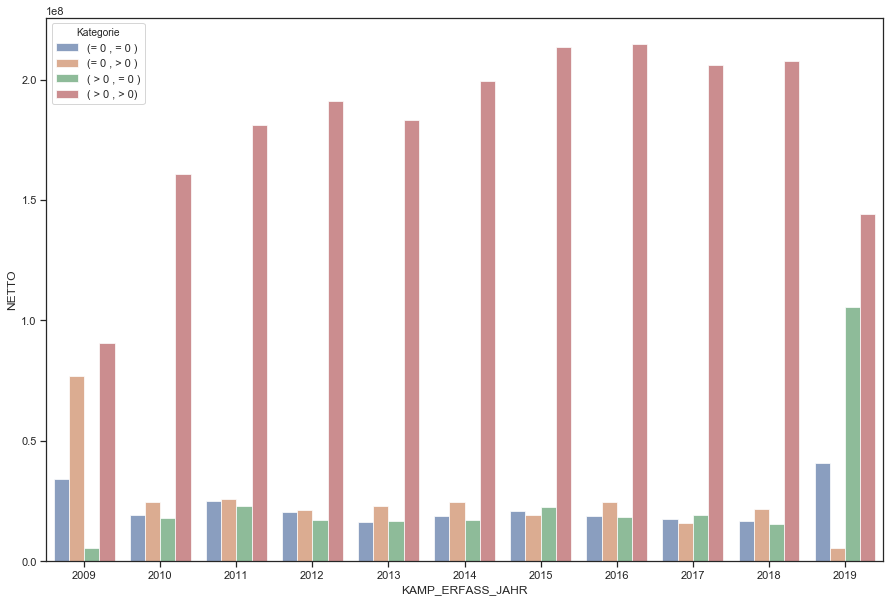

In [146]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(
    x="KAMP_ERFASS_JAHR", y="NETTO", hue="Kategorie", data=total_netto_df, alpha=0.7
)

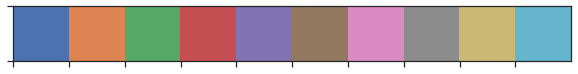

In [147]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

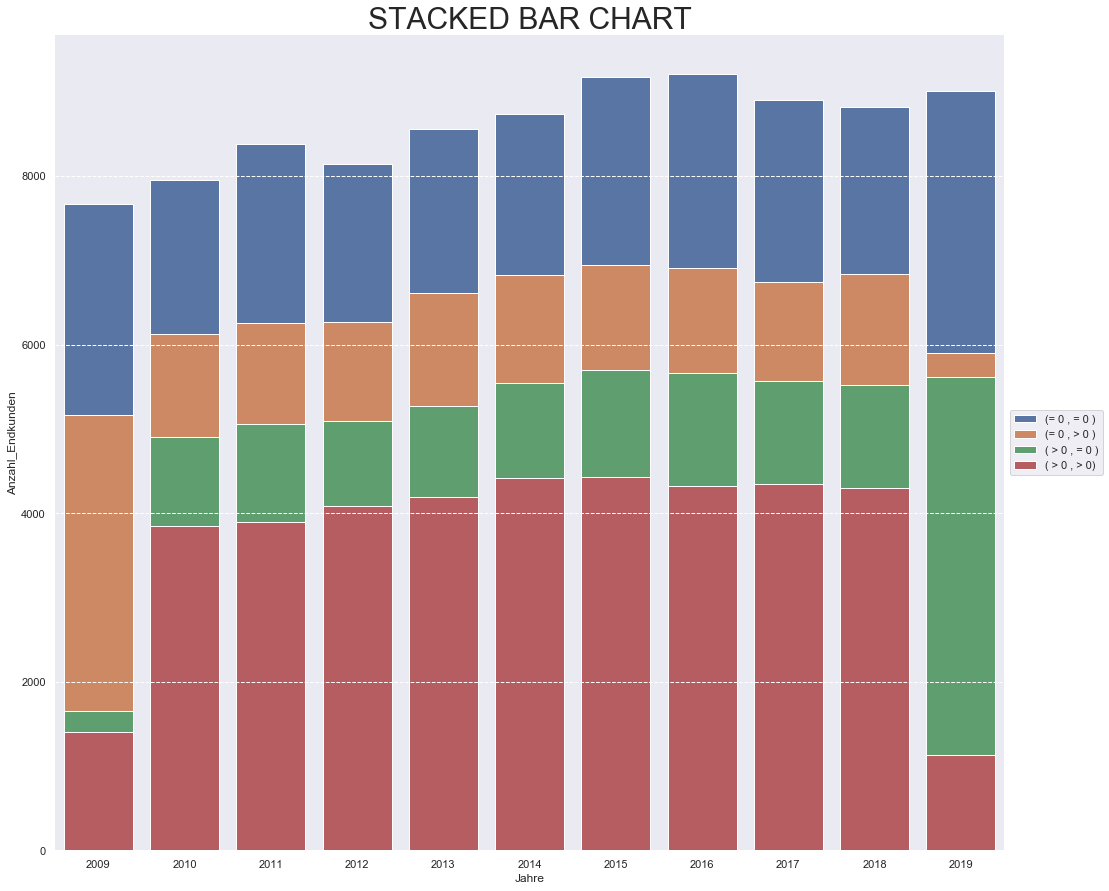

In [149]:
########################################################################################

sns.set(style="darkgrid")

# Initialize the matplotlib figure: we create subplots and plot all in the same area
f, ax = plt.subplots(figsize=(17, 15))

########################################################################################

_kategorie_serie_ = (
    total_netto_df.Kategorie.drop_duplicates().reset_index().loc[:, "Kategorie"]
)

# _value_ = "NETTO"
_value_ = "Anzahl_Endkunden"

# percentage = True  # boolean
percentage = False  # boolean

########################################################################################
if percentage == True:
    _temp_agg_total_ = (
        total_netto_df.groupby("KAMP_ERFASS_JAHR").agg({_value_: np.sum}).reset_index()
    ).rename(columns={_value_: "aggregation_total"})

########################################################################################
for index in _kategorie_serie_.index:

    # Create temporary dataframes to adjust size of the stacked bars:

    _temp_df_ = (
        total_netto_df.loc[
            total_netto_df.Kategorie.isin(set(_kategorie_serie_[index:])), :
        ]
        .groupby("KAMP_ERFASS_JAHR")
        .agg({_value_: np.sum})
        .reset_index()
    )

    # Percentage ploting:

    if percentage == True:
        _temp_df_ = pd.merge(
            left=_temp_df_, right=_temp_agg_total_, on="KAMP_ERFASS_JAHR", how="left"
        )
        _temp_df_.loc[:, _value_] = (
            _temp_df_.loc[:, _value_] / _temp_df_.aggregation_total
        )

    # barplots on top of each other -> stacked barchart

    sns.barplot(
        x="KAMP_ERFASS_JAHR",
        y=_value_,
        label=_kategorie_serie_[index],
        data=_temp_df_,
        alpha=1,  # has to be 1, otherwise everything turns into dirt....
        color=current_palette[index],
    )

########################################################################################
# Add a legend and informative axis label:
if percentage == True:
    ax.set_yticks(np.arange(0, 1.01, 0.1))

ax.legend(ncol=1, loc="center right", frameon=True, bbox_to_anchor=(1.11, 0.5))
ax.set(ylabel=f"{_value_}", xlabel="Jahre")  # xlim=(0, 24),
ax.set_title("STACKED BAR CHART", {"fontsize": 30})
ax.set_axisbelow(False)
ax.yaxis.grid(color="white", linestyle="dashed")
sns.despine(left=True, bottom=True)

########################################################################################
# Clean up:

del _kategorie_serie_, _temp_df_, _value_, f, ax, percentage

### Sankey

In [ ]:
def genSankey(df, cat_cols=[], value_cols="", title="Sankey Diagram"):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ["#4B8BBE", "#306998", "#FFE873", "#FFD43B", "#646464"]
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp = list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp

    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))

    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]] * colorNum

    # transform df into a source-target pair
    for i in range(len(cat_cols) - 1):
        if i == 0:
            sourceTargetDf = df[[cat_cols[i], cat_cols[i + 1], value_cols]]
            sourceTargetDf.columns = ["source", "target", "count"]
        else:
            tempDf = df[[cat_cols[i], cat_cols[i + 1], value_cols]]
            tempDf.columns = ["source", "target", "count"]
            sourceTargetDf = pd.concat([sourceTargetDf, tempDf])
        sourceTargetDf = (
            sourceTargetDf.groupby(["source", "target"])
            .agg({"count": "sum"})
            .reset_index()
        )

    # add index for source-target pair
    sourceTargetDf["sourceID"] = sourceTargetDf["source"].apply(
        lambda x: labelList.index(x)
    )
    sourceTargetDf["targetID"] = sourceTargetDf["target"].apply(
        lambda x: labelList.index(x)
    )

    # creating the sankey diagram
    data = dict(
        type="sankey",
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labelList,
            color=colorList,
        ),
        link=dict(
            source=sourceTargetDf["sourceID"],
            target=sourceTargetDf["targetID"],
            value=sourceTargetDf["count"],
        ),
    )

    layout = dict(title=title, font=dict(size=10))

    fig = dict(data=[data], layout=layout)
    return fig

In [ ]:
import chart_studio.plotly
import chart_studio.plotly as py

fig = genSankey(
    sankey_df,
    cat_cols=[2008, 2009, 2010, 2011, 2012],
    value_cols="Anzahl_Kunden",
    title="blah",
)
plotly.offline.plot(fig, validate=False)

In [ ]:
display(fig)

# Fourier

## Data Preparation

In [ ]:
from pa_lib.util import iso_to_datetime

In [ ]:
relevant_cols = [
    "AGPS_NR",
    "ENDKUNDE_NR",
    "KAMPAGNE_ERFASSUNGSDATUM",
    "KAMP_ERFASS_JAHR",
    "KAMP_ERFASS_KW",
    "BRUTTO",
    "NETTO",
    "ENDKUNDE_BRANCHENKAT",
    "ENDKUNDE_BRANCHENGRUPPE",
]

row_select = (
    ~bd_df_raw.KAMP_ERFASS_JAHR.isna()
    & ~bd_df_raw.KAMP_ERFASS_KW.isna()
    & (bd_df_raw.KAMPAGNEN_STATUS != 3)
    & (~bd_df_raw.ENDKUNDE_BRANCHENGRUPPE.isna())
)

apg_branche_ek_kamp = bd_df_raw.loc[row_select, relevant_cols]
apg_branche_ek_kamp = apg_branche_ek_kamp.astype(
    {"KAMP_ERFASS_JAHR": "int64", "KAMP_ERFASS_KW": "int64"}
)

# apg_branche_ek_kamp.loc[
#     :, "ENDKUNDE_BRANCHENGRUPPE"
# ] = apg_branche_ek_kamp.AUFTRAG_BRANCHENGRUPPE.map(lambda x: x[5:])

# apg_branche_ek_kamp.loc[
#     :, "ENDKUNDE_BRANCHENKAT"
# ] = apg_branche_ek_kamp.AUFTRAG_BRANCHENKAT.map(lambda x: x[5:])


date_series = apg_branche_ek_kamp.KAMP_ERFASS_JAHR.combine(
    apg_branche_ek_kamp.KAMP_ERFASS_KW,
    func=lambda year, kw: iso_to_datetime(year=year, kw=kw, day=1),
)

apg_branche_ek_kamp.loc[:, "Datum_agg"] = date_series

In [ ]:
desc_col(apg_branche_ek_kamp)

In [ ]:
apg_branche_ek_kamp.head(9)

In [ ]:
nettos_kw_br_grp = (
    apg_branche_ek_kamp.groupby(
        ["ENDKUNDE_BRANCHENKAT", "ENDKUNDE_BRANCHENGRUPPE", "Datum_agg"]
    )
    .agg({"NETTO": np.sum})
    .reset_index()
)

nettos_kw_br_grp.loc[:, "Year"] = nettos_kw_br_grp.Datum_agg.map(lambda y: y.year)

In [ ]:
desc_col(nettos_kw_br_grp)

In [ ]:
nettos_kw_br_grp.head(5)

In [ ]:
branchengruppe_liste = list(set(nettos_kw_br_grp.ENDKUNDE_BRANCHENGRUPPE))

## FB-Prophet

In [ ]:
## fbprophet related tools

from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot

import holidays

CH_holidays = holidays.CH()

import warnings

In [ ]:
import numexpr

print(f"threads: {numexpr.nthreads} of {numexpr.detect_number_of_threads()}")
print(f"cores:   {numexpr.ncores} of {numexpr.detect_number_of_cores()}")
numexpr.nthreads = 12
numexpr.ncores

In [ ]:
from datetime import timedelta, datetime, date

In [ ]:
def run_prophet(branchen_gruppe, jahr_liste):
    ################################################################################
    ## Prepare Dataset for Prophet:
    row_select = nettos_kw_br_grp.ENDKUNDE_BRANCHENGRUPPE.isin(
        {branchen_gruppe}
    ) & nettos_kw_br_grp.Year.isin(set(jahr_liste))

    df = nettos_kw_br_grp.loc[row_select, ["Datum_agg", "NETTO"]].rename(
        columns={"Datum_agg": "ds", "NETTO": "y"}
    )  # Has to be "ds" and "y"

    print(f"df.shape: {df.shape}")

    ################################################################################
    ## Define Prophet's hyper variables:

    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        interval_width=0.50,  # uncertainty in trend
        # mcmc_samples=300,    # uncertainty in seasonality, Markov chain Monte Carlo
        # holidays=ch_holidays,
        # holidays_prior_scale=10, #default is 10
        # mcmc_samples=365,  # Full Bayesian sampling, SUPER SLOW!
    )
    # Fit/Train Prophet on dataset:
    m.fit(df)

    ################################################################################
    ## Create dataset on which shall be predicted:

    # d1 = df.ds.min()
    # d2 = df.ds.max()
    d1 = datetime.date(min(jahr_liste), 1, 1)
    d2 = datetime.date(max(jahr_liste), 12, 31)

    past_future = pd.DataFrame(
        [d1 + timedelta(days=x) for x in range((d2 - d1).days + 1)], columns=["ds"]
    )

    print(f"past_future.shape: {past_future.shape}")

    # Let Prophet predict the future
    forecast = m.predict(past_future)

    ################################################################################
    # print("forecast.tail()")
    # display(forecast.tail())
    ################################################################################
    return (m, forecast, branchen_gruppe, jahr_liste)

In [ ]:
# pd.concat([temp_forecast,temp_forecast],axis="rows")

In [ ]:
temp_df = (
    nettos_kw_br_grp.groupby(["ENDKUNDE_BRANCHENGRUPPE", "Year"])
    .agg({"NETTO": np.count_nonzero})
    .reset_index()
    .rename(columns={"NETTO": "Anzahl"})
)

loop_df = temp_df.loc[temp_df.Anzahl > 25, :]

looping_list = list(zip(loop_df.iloc[:, 0], loop_df.iloc[:, 1]))

output_df = pd.DataFrame()

for (branchen_gruppe, jahr) in looping_list:
    print(branchen_gruppe, jahr)
    (m, forecast, branchen_gruppe, jahr) = run_prophet(
        branchen_gruppe=branchen_gruppe, jahr_liste=[jahr]
    )
    forecast.loc[:, "ENDKUNDE_BRANCHENGRUPPE"] = branchen_gruppe
    forecast.loc[:, "Year"] = jahr
    output_df = pd.concat([output_df, forecast], axis="rows")

output_df.loc[:, "Day_Of_Year"] = output_df.loc[:, "ds"].dt.dayofyear

output_df.loc[:, "yearly_in_kilo"] = output_df.yearly / 1_000

In [ ]:
desc_col(output_df)

In [ ]:
sns.palplot(sns.color_palette(palette="Blues", n_colors=15))
sns.palplot(sns.light_palette("green", n_colors=50))

In [ ]:
for branche in list(set(output_df.ENDKUNDE_BRANCHENGRUPPE)):
    how_many = len(
        set(output_df.loc[output_df.ENDKUNDE_BRANCHENGRUPPE == branche, "Year"])
    )
    plt.figure(figsize=(30, 10))
    ax = sns.lineplot(
        x="Day_Of_Year",  # datetime series
        y="yearly_in_kilo",  # prediction
        hue="Year",
        # style="Year",
        data=output_df.loc[output_df.ENDKUNDE_BRANCHENGRUPPE == branche, :],
        linewidth=5.0,
        alpha=1.0,
        # palette=sns.color_palette(palette='Blues',n_colors=how_many)
        # palette=sns.light_palette('green',n_colors=how_many)
        palette=sns.color_palette("Paired", how_many),
    )
    plt.title(branche)
    plt.show()

In [ ]:
looping_list = list(set(nettos_kw_br_grp.ENDKUNDE_BRANCHENGRUPPE))

output_df = pd.DataFrame()

for branchen_gruppe in looping_list:
    print(branchen_gruppe,)
    jahres_liste_branche = list(
        set(
            nettos_kw_br_grp.loc[
                nettos_kw_br_grp.ENDKUNDE_BRANCHENGRUPPE == branchen_gruppe, "Year"
            ]
        )
    )
    (m, forecast, branchen_gruppe, jahr) = run_prophet(
        branchen_gruppe=branchen_gruppe, jahr_liste=jahres_liste_branche
    )

    forecast.loc[:, "ENDKUNDE_BRANCHENGRUPPE"] = branchen_gruppe
    output_df = pd.concat([output_df, forecast], axis="rows")

output_df.loc[:, "Day_Of_Year"] = output_df.loc[:, "ds"].dt.dayofyear

In [ ]:
output_df.loc[:, "Year"] = output_df.ds.map(lambda x: x.year)
output_df.loc[:, "yearly_in_kilo"] = output_df.yearly / 1_000

In [ ]:
for branche in list(set(output_df.ENDKUNDE_BRANCHENGRUPPE)):
    how_many = len(
        set(output_df.loc[output_df.ENDKUNDE_BRANCHENGRUPPE == branche, "Year"])
    )
    plt.figure(figsize=(30, 10))
    ax = sns.lineplot(
        x="Day_Of_Year",  # datetime series
        y="yearly_in_kilo",  # prediction
        hue="Year",
        # style="Year",
        data=output_df.loc[output_df.ENDKUNDE_BRANCHENGRUPPE == branche, :],
        linewidth=1.0,
        alpha=1.0,
        # palette=sns.color_palette(palette='Blues',n_colors=how_many)
        palette=sns.light_palette("green", n_colors=how_many),
    )
    plt.title(branche)
    plt.show()

# Churn: Delta T 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Prep

In [61]:
from pa_lib.vis import boxplot_histogram

In [217]:
from dateutil.relativedelta import relativedelta

,ENDKUNDE_NR,ENDKUNDE,ENDKUNDE_BRANCHENKAT,ENDKUNDE_BRANCHENGRUPPE,AGPS_Count,KAMPAGNE_ERFASSUNGSDATUM,Current_Delta_T
3658,132416,SIT Genève,WB - Behörden / Politik,WG - Parteien,7,2011-07-28,3129
22989,591988,Pool Promotion Gruyères,WB - Freizeit / Touristik,WG - Reisen / Hotels / Sanatorien,17,2015-01-19,1858
24560,600461,FDP Schaffhausen,WB - Behörden / Politik,WG - Parteien,20,2016-07-18,1312
33090,654911,AMG-Immobilien GmbH,WB - Dienstleistung,WG - Dienstleistung,1,2019-04-25,301
34311,662572,wilsch - queer Winterthur,WB - Behörden / Politik,WG - Parteien,3,2019-12-30,52


,DTYPE,NULLS,UNIQUE
ENDKUNDE_NR,int64,0/34576,34576
ENDKUNDE,object,0/34576,32372
ENDKUNDE_BRANCHENKAT,object,0/34576,23
ENDKUNDE_BRANCHENGRUPPE,object,0/34576,84
AGPS_Count,int64,0/34576,752
KAMPAGNE_ERFASSUNGSDATUM,datetime64[ns],0/34576,3119
Current_Delta_T,int64,0/34576,3119


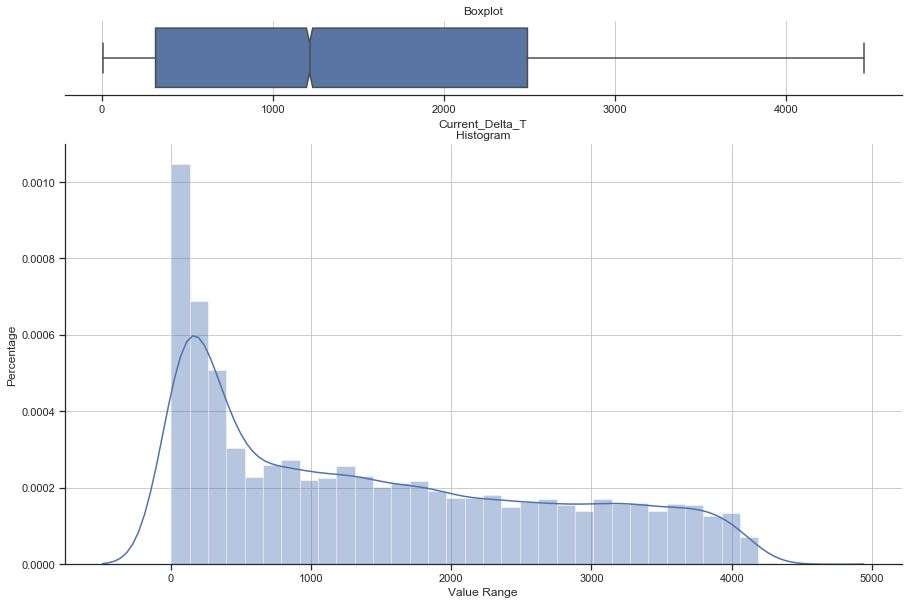

In [583]:
########################################################################################
# Subselect of bd_df_raw: interesting columns. no canceled campaigns (rows):

_interesting_columns_ = [
    # "AGPS_NR",
    "KAMPAGNE_ERFASSUNGSDATUM",
    # "KAMPAGNEN_STATUS",
    "ENDKUNDE_NR",
    "ENDKUNDE",
    "ENDKUNDE_BRANCHENKAT",
    "ENDKUNDE_BRANCHENGRUPPE",
    "AGPS_NR",
]

########################################################################################

scoring_deltas_df = (
    (
        bd_df_raw.loc[bd_df_raw.KAMPAGNEN_STATUS != 3, _interesting_columns_]
        .drop_duplicates()
        .sort_values(["ENDKUNDE_NR", "KAMPAGNE_ERFASSUNGSDATUM"])
        .reset_index(drop=True)
        .astype(
            {
                "ENDKUNDE": "str",
                "ENDKUNDE_BRANCHENKAT": "str",
                "ENDKUNDE_BRANCHENGRUPPE": "str",
            }
        )
    )
    .groupby(
        ["ENDKUNDE_NR", "ENDKUNDE", "ENDKUNDE_BRANCHENKAT", "ENDKUNDE_BRANCHENGRUPPE"]
    )
    .agg({"AGPS_NR": np.count_nonzero, "KAMPAGNE_ERFASSUNGSDATUM": np.max})
    .reset_index()
    .rename(columns={"AGPS_NR": "AGPS_Count"})
)
########################################################################################

scoring_deltas_df.loc[:, "Current_Delta_T"] = (
    datetime.datetime.today() - scoring_deltas_df.KAMPAGNE_ERFASSUNGSDATUM
).dt.days

########################################################################################

del _interesting_columns_

########################################################################################

display(scoring_deltas_df.sample(5))
display(desc_col(scoring_deltas_df))

boxplot_histogram(scoring_deltas_df.Current_Delta_T)

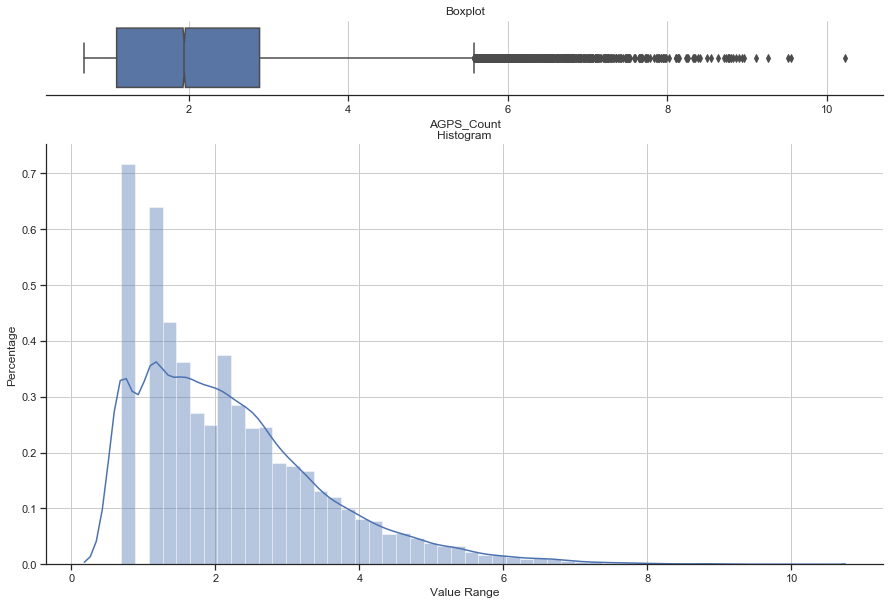

In [489]:
boxplot_histogram(np.log(scoring_deltas_df.AGPS_Count + 1))

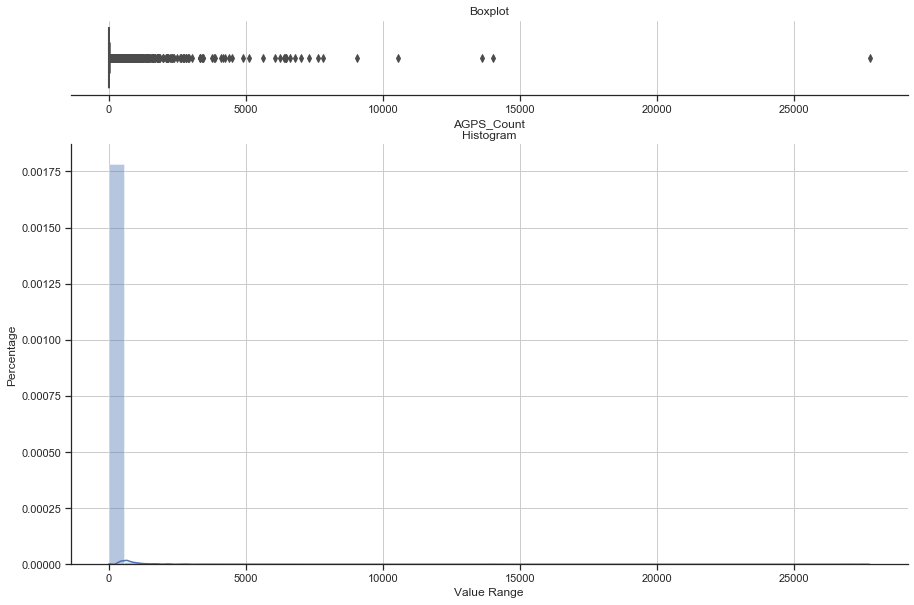

In [490]:
boxplot_histogram(scoring_deltas_df.AGPS_Count + 1)

,Delta_T,Date_Before,Date_After,ENDKUNDE_NR,Delta_T_int,ENDKUNDE,ENDKUNDE_BRANCHENKAT,ENDKUNDE_BRANCHENGRUPPE
88732,1022 days,2010-01-25,2012-11-12,476466,1022,ESL Education SA,WB - Dienstleistung,WG - Ausbildung
69915,58 days,2009-01-05,2009-03-04,331569,58,netto Einkaufsgruppe AG,WB - Haus / Garten,WG - Hausbau / Ausstattung
117079,8 days,2008-10-16,2008-10-24,102697,8,ALIMENTARIUM,WB - Veranstaltungen,WG - Veranstaltungen
181390,14 days,2019-02-28,2019-03-14,123959,14,Genossenschaft Olma Messen St. Gallen,WB - Dienstleistung,WG - Dienstleistung
26335,11 days,2019-05-27,2019-06-07,147081,11,Parti Libéral-Radical Neuchâtelois,WB - Behörden / Politik,WG - Parteien
55904,365 days,2013-04-01,2014-04-01,176271,365,Gundeli-Garage AG,WB - Verkehr,WG - Automarkt
2711,19 days,2010-09-16,2010-10-05,132752,19,Compagnie des Montres Longines,WB - Bekleidung / persönlicher Bedarf,WG - Persönlicher Bedarf
4175,5 days,2019-08-30,2019-09-04,133865,5,Cornèr Banca SA,WB - Finanzwirtschaft / Versicherung,WG - Finanzwirtschaft
29907,366 days,2015-01-27,2016-01-28,542814,366,Kulturverein Sagibach,WB - Investition / Industrie,WG - Industrie / Verbände
107369,7 days,2009-11-04,2009-11-11,100128,7,Christinger AG,WB - Dienstleistung,WG - Dienstleistung


,DTYPE,NULLS,UNIQUE
Delta_T,timedelta64[ns],0/201334,2424
Date_Before,datetime64[ns],0/201334,3333
Date_After,datetime64[ns],0/201334,3255
ENDKUNDE_NR,int64,0/201334,21890
Delta_T_int,int64,0/201334,2424
ENDKUNDE,object,0/201334,20587
ENDKUNDE_BRANCHENKAT,object,0/201334,23
ENDKUNDE_BRANCHENGRUPPE,object,0/201334,83


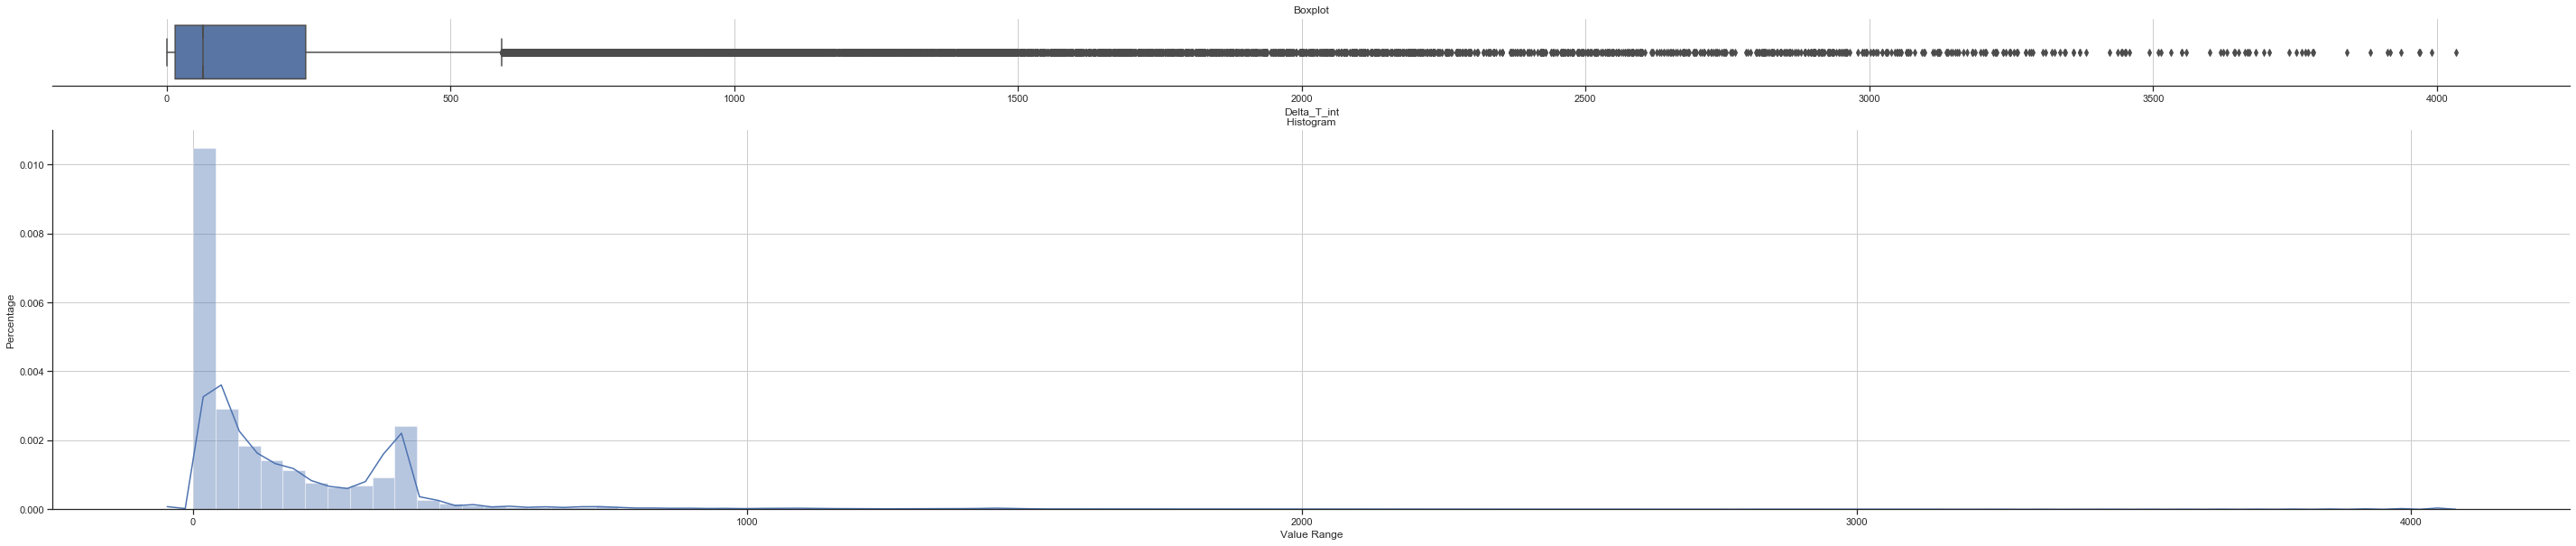

Wall time: 1min 23s


In [588]:
%%time
########################################################################################
# Subselect of bd_df_raw: interesting columns. no canceled campaigns (rows):

_interesting_columns_ = [
    # "AGPS_NR",
    "KAMPAGNE_ERFASSUNGSDATUM",
    # "KAMPAGNEN_STATUS",
    "ENDKUNDE_NR",
    "ENDKUNDE",
    "ENDKUNDE_BRANCHENKAT",
    "ENDKUNDE_BRANCHENGRUPPE",
]

churn_df = (
    bd_df_raw.loc[
        bd_df_raw.KAMPAGNEN_STATUS != 3, _interesting_columns_
    ]  # cancelled campagins
    .astype(
        {
            "ENDKUNDE": "str",
            "ENDKUNDE_BRANCHENKAT": "str",
            "ENDKUNDE_BRANCHENGRUPPE": "str",
        }
    )
    .drop_duplicates()
    .sort_values(
        ["ENDKUNDE_NR", "KAMPAGNE_ERFASSUNGSDATUM"]
    )  # -> important, keep it for the shift!
    .reset_index(drop=True)
)

_branchen_df_ = churn_df.loc[
    :, ["ENDKUNDE_NR", "ENDKUNDE", "ENDKUNDE_BRANCHENKAT", "ENDKUNDE_BRANCHENGRUPPE"]
].drop_duplicates()

########################################################################################
# List of all customers with at least 2 campaigns (different dates)

_check_df_ = (
    churn_df.groupby(by="ENDKUNDE_NR")
    .agg({"KAMPAGNE_ERFASSUNGSDATUM": np.count_nonzero})
    .reset_index()
)

ek_liste = list(
    set(_check_df_.loc[_check_df_.KAMPAGNE_ERFASSUNGSDATUM > 1, "ENDKUNDE_NR"])
)  # set of all customers with at least two resevations (TWO different res-dates required)

########################################################################################
# Computing dataframe with delta-t's:

training_deltas_df = pd.DataFrame()

for ek in ek_liste:
    _after_ = churn_df.loc[churn_df.ENDKUNDE_NR == ek, "KAMPAGNE_ERFASSUNGSDATUM"]
    _delta_t_ = pd.Series(_after_ - _after_.shift())  # -> shift older res-date one down
    _container_df_ = pd.DataFrame(
        {"Delta_T": _delta_t_, "Date_Before": _after_.shift(), "Date_After": _after_}
    )
    _container_df_.loc[:, "ENDKUNDE_NR"] = ek
    training_deltas_df = pd.concat([training_deltas_df, _container_df_])

training_deltas_df = (
    training_deltas_df.dropna()
)  # first res-date has no previous res-date before.

training_deltas_df.loc[
    :, "Delta_T_int"
] = training_deltas_df.Delta_T.dt.days  # create integer

########################################################################################
# Add branchen back to delta-table:

training_deltas_df = pd.merge(
    training_deltas_df, _branchen_df_, on="ENDKUNDE_NR", how="left"
)

training_deltas_df.loc[
    :, "ENDKUNDE_BRANCHENKAT"
] = training_deltas_df.ENDKUNDE_BRANCHENKAT.fillna("MISSING")

training_deltas_df.loc[
    :, "ENDKUNDE_BRANCHENGRUPPE"
] = training_deltas_df.ENDKUNDE_BRANCHENGRUPPE.fillna("MISSING")

########################################################################################
# Cleanup:

del _delta_t_, _interesting_columns_, _check_df_, ek_liste, _branchen_df_, churn_df

########################################################################################
display(training_deltas_df.sample(10))
display(desc_col(training_deltas_df))

boxplot_histogram(training_deltas_df.Delta_T_int, bins=100, figsize=(50, 10))

In [611]:
fixed_current_date = datetime.datetime.now()

########################################################################################
# Check for the last 40 years, which Delta_T are interesting to look at based on fixed

only_delta_t_based_on_fixed_date = pd.Series([False] * training_deltas_df.shape[0])

for _date_ in [fixed_current_date - relativedelta(years=x) for x in range(0, 40, 1)]:
    before_earlier = training_deltas_df.Date_Before <= _date_
    after_later = _date_ <= training_deltas_df.Date_After
    is_it_between = before_earlier & after_later
    only_delta_t_based_on_fixed_date |= is_it_between
########################################################################################
# Clean up:
del _date_, before_earlier, after_later, is_it_between

In [612]:
training_deltas_df_backup.shape

(201334, 8)

In [613]:
training_deltas_df_backup = training_deltas_df.copy(deep=True)

In [614]:
training_deltas_df.loc[only_delta_t_based_on_fixed_date, :].shape

(71661, 11)

In [615]:
training_deltas_df = training_deltas_df.loc[only_delta_t_based_on_fixed_date, :]

__Output:__

1. For training: ``training_deltas_df`` (dataframe)
2. For scoring:   ``scoring_deltas_df`` (dataframe)

### Categories with AGPS count

In [621]:
quantile_array = np.quantile(
    scoring_deltas_df.AGPS_Count,
    q=np.linspace(start=0, stop=1, endpoint=True, num=5),
    interpolation="midpoint",
)
quantile_array[-1] += 1

print(quantile_array)

########################################################################################


def categorise_quantile(number):
    for x in range(0, len(quantile_array) - 1, 1):
        # print(x)
        if quantile_array[x] <= number < quantile_array[x + 1]:
            gotcha = x
    return gotcha


########################################################################################

_count_categories_ = scoring_deltas_df.AGPS_Count.map(lambda x: categorise_quantile(x))
scoring_deltas_df.loc[:, "Quantile_Count_Cat"] = _count_categories_

########################################################################################

del quantile_array, _count_categories_

########################################################################################

training_deltas_df = pd.merge(
    training_deltas_df,
    scoring_deltas_df.loc[:, ["ENDKUNDE_NR", "Quantile_Count_Cat"]],
    on="ENDKUNDE_NR",
    how="left",
)

[1.000e+00 2.000e+00 6.000e+00 1.600e+01 2.777e+04]


In [622]:
desc_col(training_deltas_df)

,DTYPE,NULLS,UNIQUE
Delta_T,timedelta64[ns],0/71661,2424
Date_Before,datetime64[ns],0/71661,2870
Date_After,datetime64[ns],0/71661,2964
ENDKUNDE_NR,int64,0/71661,18395
Delta_T_int,int64,0/71661,2424
ENDKUNDE,object,0/71661,17359
ENDKUNDE_BRANCHENKAT,object,0/71661,23
ENDKUNDE_BRANCHENGRUPPE,object,0/71661,83
Quantile_Count_Cat,int64,0/71661,3


In [596]:
set(training_deltas_df.Quantile_Count_Cat)

{1, 2, 3}

In [597]:
set(scoring_deltas_df.Quantile_Count_Cat)

{0, 1, 2, 3}

### Exploration

In [322]:
from scipy.stats import mannwhitneyu

In [324]:
# Build empty quadratic Dataframe:

_columns_ = pd.Series(list(set(training_deltas_df.ENDKUNDE_BRANCHENKAT)))
_length_ = len(_columns_)

_empty_df_ = pd.DataFrame(
    [[-1.1] * _length_] * _length_, columns=_columns_, index=_columns_
)

for _index_1_ in _columns_.index:
    for _index_2_ in _columns_.index[_index_1_:]:
        _row_select_ = training_deltas_df.ENDKUNDE_BRANCHENKAT == _columns_[_index_1_]
        _series_one_ = training_deltas_df.loc[_row_select_, "Delta_T_int"]
        _row_select_ = training_deltas_df.ENDKUNDE_BRANCHENKAT == _columns_[_index_2_]
        _series_two_ = training_deltas_df.loc[_row_select_, "Delta_T_int"]

        _empty_df_.iloc[_index_1_, _index_2_] = mannwhitneyu(
            _series_one_, _series_two_, use_continuity=True, alternative="two-sided"
        )[
            1
        ]  # p-value
        _empty_df_.iloc[_index_2_, _index_1_] = _empty_df_.iloc[_index_1_, _index_2_]

del _columns_, _length_, _index_1_, _index_2_, _row_select_, _series_one_, _series_two_

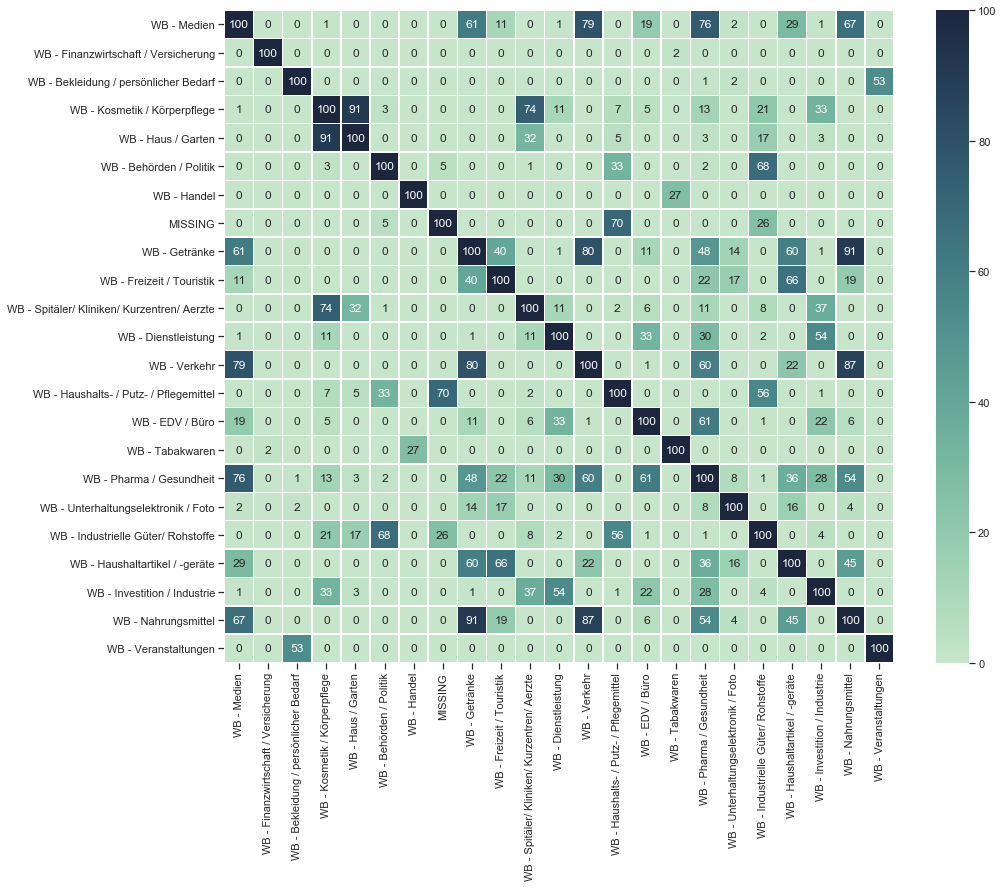

In [325]:
plt.figure(figsize=(15, 12))
sns.heatmap(
    np.round(_empty_df_ * 100),
    annot=True,
    linewidths=0.5,
    cmap=sns.cubehelix_palette(rot=-0.4, as_cmap=True),
    fmt="g",
)

## Kernel Density

[Scikit-Learn: Kernel Density Estimation](https://scikit-learn.org/stable/modules/density.html#kernel-density)

In [357]:
from sklearn.neighbors import KernelDensity
import numpy as np

### Training

In [623]:
%%time

########################################################################################

estimated_kde_df = pd.DataFrame()  # output!


## Compute gaussian kde for each Branchen-Kategorie:

branchenkat_liste = list(set(scoring_deltas_df.ENDKUNDE_BRANCHENKAT))

for branchen_kategorie in branchenkat_liste:

    ## Subselect branchen_kategorie for Training:

    _row_select_ = training_deltas_df.ENDKUNDE_BRANCHENKAT == branchen_kategorie
    Delta_T_series = training_deltas_df.loc[_row_select_, :].Delta_T_int
    X_training = [[x] for x in Delta_T_series.to_numpy()]

    ## Fit training data:

    kde = KernelDensity(kernel="gaussian", bandwidth=2).fit(X_training)
    # -> https://scikit-learn.org/stable/modules/density.html#kernel-density #

    ## Extract current maximum Delta_T:

    _max_ = scoring_deltas_df.loc[
        scoring_deltas_df.ENDKUNDE_BRANCHENKAT == branchen_kategorie, :
    ].Current_Delta_T.max()

    ## Set range for Delta_T:

    delta_t = list(range(-365 * 1, _max_ + 10, 1))

    ## Compute Density function and Integral of density:

    _x_prep_ = [[x] for x in delta_t]
    y_log_density = kde.score_samples(_x_prep_)
    y_density = np.exp(y_log_density)  # density
    y_prob = np.cumsum(y_density)  # Cumulative Sum ~> Probability

    ## Combine everything into a handy dataframe:

    _prob_df_ = pd.DataFrame(
        {
            "Delta_T": delta_t,
            "y_log_density": y_log_density,
            "y_gaussian_kde": y_density,
            "P_Churn": y_prob,
        }
    )
    _prob_df_.loc[:, "ENDKUNDE_BRANCHENKAT"] = branchen_kategorie

    ## Paste into overarching dataframe:

    estimated_kde_df = pd.concat([estimated_kde_df, _prob_df_])

########################################################################################
# Clean up:

del (
    branchenkat_liste,
    _row_select_,
    Delta_T_series,
    X_training,
    kde,
    _max_,
    delta_t,
    _x_prep_,
    y_log_density,
    y_density,
    y_prob,
    _prob_df_,
)

########################################################################################
print(estimated_kde_df.shape)
display(desc_col(estimated_kde_df))

(104289, 5)


,DTYPE,NULLS,UNIQUE
Delta_T,int64,0/104289,4826
y_log_density,float64,0/104289,55425
y_gaussian_kde,float64,0/104289,39100
P_Churn,float64,0/104289,51102
ENDKUNDE_BRANCHENKAT,object,0/104289,23


Wall time: 2.79 s


In [513]:
estimated_kde_df.describe()

,Delta_T,y_log_density,y_gaussian_kde,P_Churn
count,99463.000000,99463.000000,9.946300e+04,99463.000000
mean,1896.028604,-7927.754171,2.211878e-04,0.837123
std,1306.819228,35184.337765,1.438429e-03,0.321442
min,-365.000000,-469001.292434,0.000000e+00,0.000000
25%,765.000000,-1412.918915,0.000000e+00,0.925466
50%,1895.000000,-46.964041,4.015837e-21,0.986270
75%,3025.000000,-10.108509,4.073151e-05,0.998471
max,4275.000000,-2.454060,8.594394e-02,1.000000


In [624]:
%%time

########################################################################################

estimated_kde_df = pd.DataFrame()  # output!


## Compute gaussian kde for each Branchen-Kategorie:

branchenkat_liste = [
    x for x in list(set(scoring_deltas_df.Quantile_Count_Cat)) if x > 0
]

for branchen_kategorie in branchenkat_liste:

    ## Subselect branchen_kategorie for Training:

    _row_select_ = training_deltas_df.Quantile_Count_Cat == branchen_kategorie
    Delta_T_series = training_deltas_df.loc[_row_select_, :].Delta_T_int
    X_training = [[x] for x in Delta_T_series.to_numpy()]

    ## Fit training data:

    kde = KernelDensity(kernel="gaussian", bandwidth=2).fit(X_training)
    # -> https://scikit-learn.org/stable/modules/density.html#kernel-density #

    ## Extract current maximum Delta_T:

    _max_ = scoring_deltas_df.loc[
        scoring_deltas_df.Quantile_Count_Cat == branchen_kategorie, :
    ].Current_Delta_T.max()

    ## Set range for Delta_T:

    delta_t = list(range(-365 * 1, _max_ + 10, 1))

    ## Compute Density function and Integral of density:

    _x_prep_ = [[x] for x in delta_t]
    y_log_density = kde.score_samples(_x_prep_)
    y_density = np.exp(y_log_density)  # density
    y_prob = np.cumsum(y_density)  # Cumulative Sum ~> Probability

    ## Combine everything into a handy dataframe:

    _prob_df_ = pd.DataFrame(
        {
            "Delta_T": delta_t,
            "y_log_density": y_log_density,
            "y_gaussian_kde": y_density,
            "P_Churn": y_prob,
        }
    )
    _prob_df_.loc[:, "Quantile_Count_Cat"] = branchen_kategorie

    ## Paste into overarching dataframe:

    estimated_kde_df = pd.concat([estimated_kde_df, _prob_df_])

########################################################################################
# Clean up:

del (
    branchenkat_liste,
    _row_select_,
    Delta_T_series,
    X_training,
    kde,
    _max_,
    delta_t,
    _x_prep_,
    y_log_density,
    y_density,
    y_prob,
    _prob_df_,
)

########################################################################################
print(estimated_kde_df.shape)
display(desc_col(estimated_kde_df))

(13769, 5)


,DTYPE,NULLS,UNIQUE
Delta_T,int64,0/13769,4674
y_log_density,float64,0/13769,11763
y_gaussian_kde,float64,0/13769,10333
P_Churn,float64,0/13769,11037
Quantile_Count_Cat,int64,0/13769,3


Wall time: 4.63 s


### Visual check

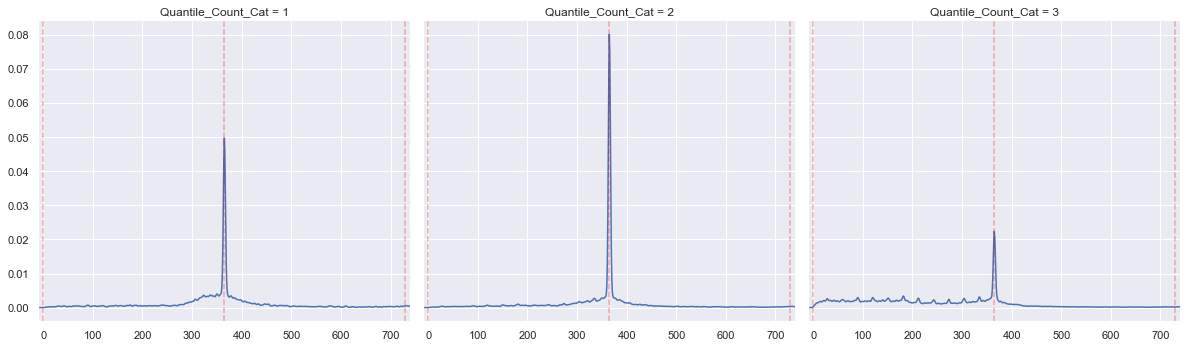

In [625]:
sns.set_style("darkgrid")

ax = sns.relplot(
    x="Delta_T",
    y="y_gaussian_kde",
    # y="y_log_density",
    # col="ENDKUNDE_BRANCHENKAT",
    col="Quantile_Count_Cat",
    kind="line",
    # hue="ENDKUNDE_BRANCHENKAT",
    data=estimated_kde_df,
    col_wrap=4,
    aspect=1.1,
)
for _day_ in [0, 365, 2 * 365]:
    ax.map(plt.axvline, x=_day_, ls="--", c="red", alpha=0.3)  # vertical line at _day_

ax.set(xlim=(-10, 2 * 365 + 10))

plt.savefig("estimated_kde_branchen_kategorie.png")

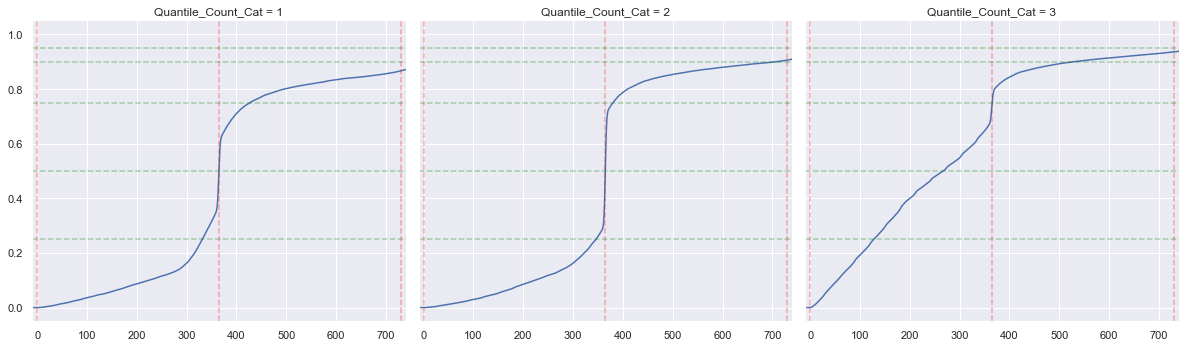

In [626]:
sns.set_style("darkgrid")

ax = sns.relplot(
    x="Delta_T",
    y="P_Churn",
    # col="ENDKUNDE_BRANCHENKAT",
    col="Quantile_Count_Cat",
    kind="line",
    # hue="ENDKUNDE_BRANCHENKAT",
    data=estimated_kde_df,
    col_wrap=4,
    aspect=1.1,
)

for _day_ in [0, 365, 2 * 365]:
    ax.map(plt.axvline, x=_day_, ls="--", c="red", alpha=0.3)  # vertical line at _day_

for percent in [0.25, 0.5, 0.75, 0.9, 0.95]:
    ax.map(
        plt.axhline, y=percent, ls="--", c="green", alpha=0.3
    )  # horizontal line at _day_

ax.set(xlim=(-10, 2 * 365 + 10))

plt.savefig("estimated_kde_branchen_kategorie_integral.png")

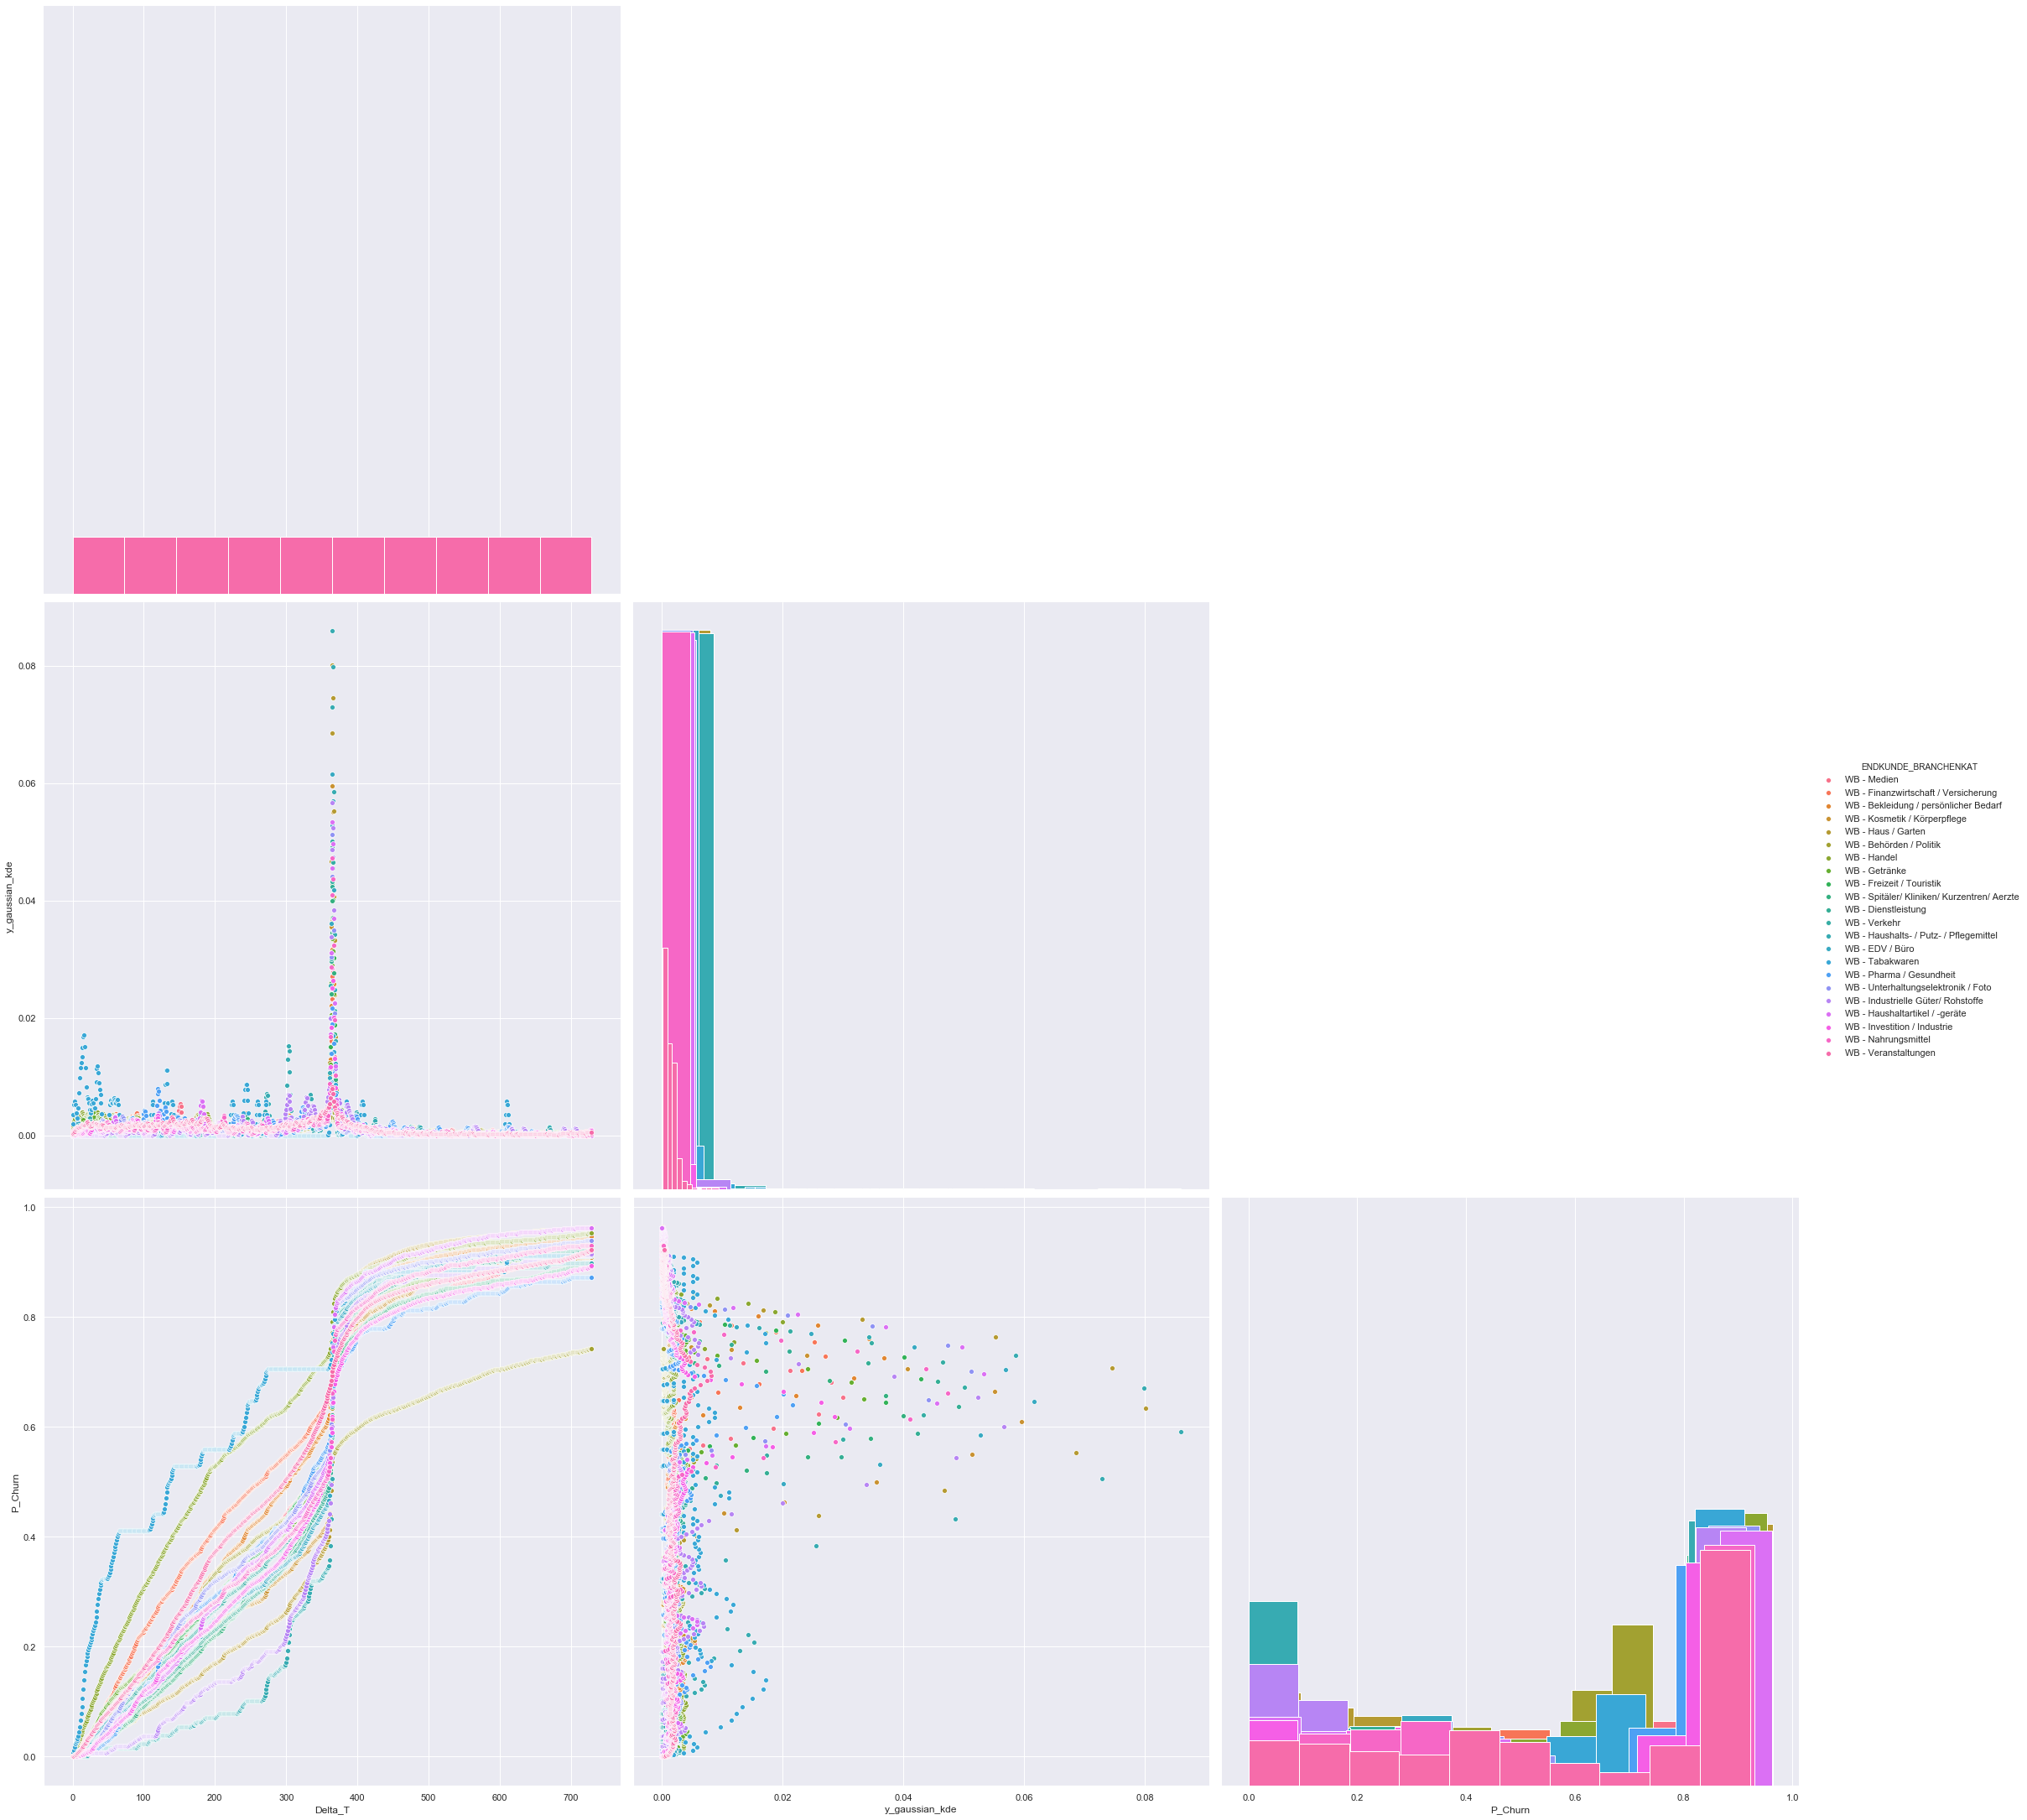

In [371]:
sns.set(style="darkgrid")


sns.pairplot(
    data=estimated_kde_df.loc[
        (estimated_kde_df.Delta_T < 365 * 2) & (estimated_kde_df.Delta_T > -1), :
    ],
    x_vars=["Delta_T", "y_gaussian_kde", "P_Churn"],
    y_vars=["Delta_T", "y_gaussian_kde", "P_Churn"],
    height=10,
    hue="ENDKUNDE_BRANCHENKAT",
    diag_kind="hist",
    corner=True,
)

**Output:**
1. ``estimated_kde_df``

## Scoring

desc_col


,DTYPE,NULLS,UNIQUE
ENDKUNDE_NR,int64,0/32552,32552
ENDKUNDE,category,0/32552,30461
ENDKUNDE_BRANCHENKAT,object,0/32552,22
ENDKUNDE_BRANCHENGRUPPE,category,0/32552,83
KAMPAGNE_ERFASSUNGSDATUM,datetime64[ns],0/32552,3053
Current_Delta_T,int64,0/32552,3053
y_log_density,float64,0/32552,13760
y_gaussian_kde,float64,0/32552,12384
P_Churn,float64,0/32552,12920


sample


,ENDKUNDE_NR,ENDKUNDE,ENDKUNDE_BRANCHENKAT,ENDKUNDE_BRANCHENGRUPPE,KAMPAGNE_ERFASSUNGSDATUM,Current_Delta_T,y_log_density,y_gaussian_kde,P_Churn
31630,657429,Komitee «JA zum Naturparkgesetz»,WB - Behörden / Politik,WG - Parteien,2019-07-15,217,-7.020242,8.936094e-04,0.356791
17781,561819,Bucher AG,WB - Freizeit / Touristik,WG - Freizeit / Sport,2012-10-29,2667,-18.411295,1.009430e-08,0.996681
29102,639323,B+C Rüst,WB - Behörden / Politik,WG - Parteien,2018-01-22,756,-7.613768,4.936086e-04,0.752014
2314,121738,INOBAT,WB - Investition / Industrie,WG - Industrie / Verbände,2017-01-24,1119,-13.853684,9.625458e-07,0.941609
11043,507466,Wenger Motos,WB - Verkehr,WG - Automarkt,2015-02-24,1819,-10.553135,2.611150e-05,0.985781
19228,572788,Hofstetter & Partner Immobilien-Treuhand AG,WB - Dienstleistung,WG - Dienstleistung,2013-02-12,2561,-17.311261,3.032598e-08,0.996178
9383,493078,VERA Gartengeräte AG,WB - Haus / Garten,WG - Garten / Gartenpflege,2010-09-27,3430,-42.577293,3.227876e-19,0.999361
10866,506421,Paul von Arx,WB - Dienstleistung,WG - Dienstleistung,2008-12-24,4072,-851.704418,0.000000e+00,1.000000
31969,659924,Clinius Praxis Embrach,WB - Kosmetik / Körperpflege,WG - Zahnpflege,2019-10-04,136,-7.733404,4.379509e-04,0.151901
23915,604175,NMN Productions,WB - Veranstaltungen,WG - Veranstaltungen,2017-08-16,915,-9.744248,5.863091e-05,0.949194


describe


,ENDKUNDE_NR,Current_Delta_T,y_log_density,y_gaussian_kde,P_Churn
count,32552.000000,32552.000000,32552.000000,3.255200e+04,3.255200e+04
mean,486142.172493,1443.510414,-522.326523,5.578072e-04,7.413082e-01
std,178415.290256,1224.217917,5350.310255,1.556465e-03,3.581834e-01
min,100034.000000,2.000000,-463208.263446,0.000000e+00,2.038153e-17
25%,478564.500000,293.000000,-17.007762,4.107929e-08,4.094478e-01
50%,550484.500000,1182.000000,-9.830103,5.380721e-05,9.644477e-01
75%,608568.500000,2411.250000,-6.987865,9.230147e-04,9.943925e-01
max,664390.000000,4263.000000,-2.940968,5.281459e-02,1.000000e+00


P_Churn


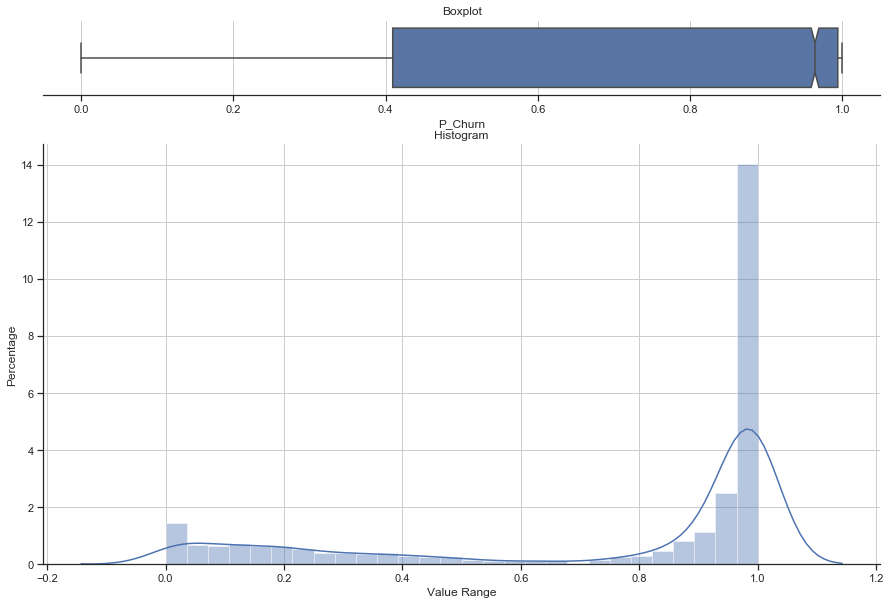

In [372]:
########################################################################################
# Simple scoring: Left join on branche and Delta_T:

scored_ek_df = pd.merge(
    scoring_deltas_df,
    estimated_kde_df,
    left_on=["Current_Delta_T", "ENDKUNDE_BRANCHENKAT"],
    right_on=["Delta_T", "ENDKUNDE_BRANCHENKAT"],
    how="left",
).drop(columns=["Delta_T"], errors="ignore", inplace=False)

########################################################################################
print("desc_col")
display(desc_col(scored_ek_df))
print("sample")
display(scored_ek_df.sample(10))
print("describe")
display(scored_ek_df.describe())
print("P_Churn")
boxplot_histogram(scored_ek_df.P_Churn)

In [373]:
scored_ek_df.columns

Index(['ENDKUNDE_NR', 'ENDKUNDE', 'ENDKUNDE_BRANCHENKAT',
       'ENDKUNDE_BRANCHENGRUPPE', 'KAMPAGNE_ERFASSUNGSDATUM',
       'Current_Delta_T', 'y_log_density', 'y_gaussian_kde', 'P_Churn'],
      dtype='object')

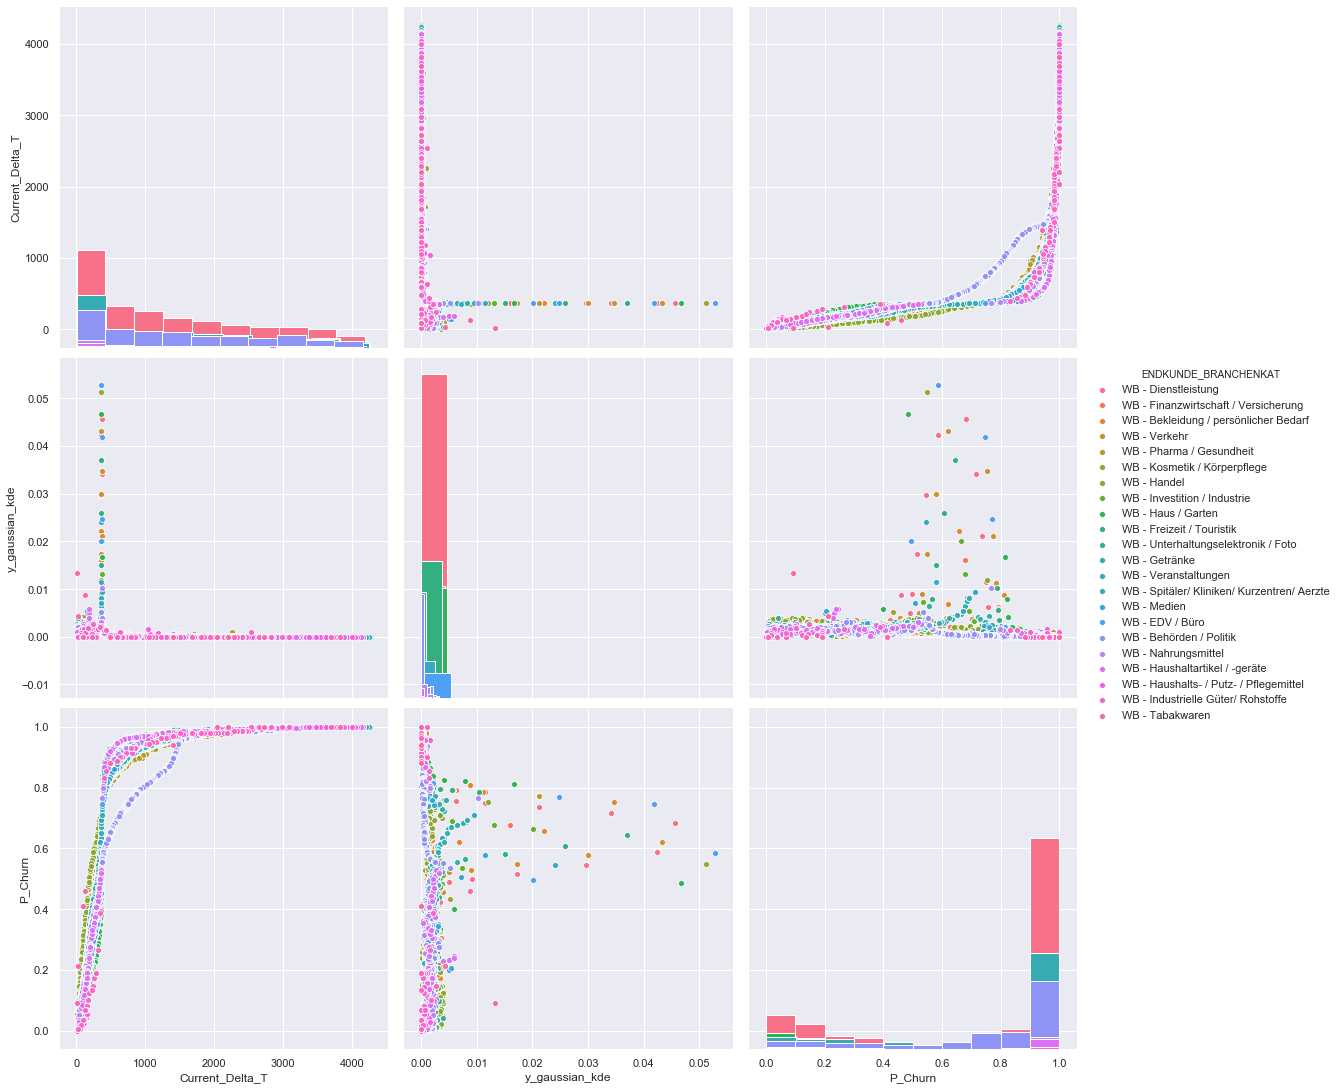

In [374]:
sns.set(style="darkgrid")
_interesting_columns_ = [
    "ENDKUNDE_BRANCHENKAT",
    "Current_Delta_T",
    "y_gaussian_kde",
    "P_Churn",
]

sns.pairplot(
    scored_ek_df.loc[:, _interesting_columns_],
    hue="ENDKUNDE_BRANCHENKAT",
    height=5,
    palette="husl",
    # corner=True,
    diag_kind="hist",
)

## Compare Extremes (Churned/Active)

In [375]:
_activceness_categories_ = scored_ek_df.P_Churn.apply(
    lambda x: (x > 0.99) * "GONE"
    + ((x <= 0.99) and x > 0.40) * "MEH"
    + (x <= 0.40) * "ACTIVE"
)

scored_ek_df.loc[:, "Category"] = _activceness_categories_

In [376]:
scored_ek_df.groupby("Category").agg({"ENDKUNDE_NR": np.count_nonzero})

,ENDKUNDE_NR
Category,
ACTIVE,8057
GONE,10152
MEH,14343


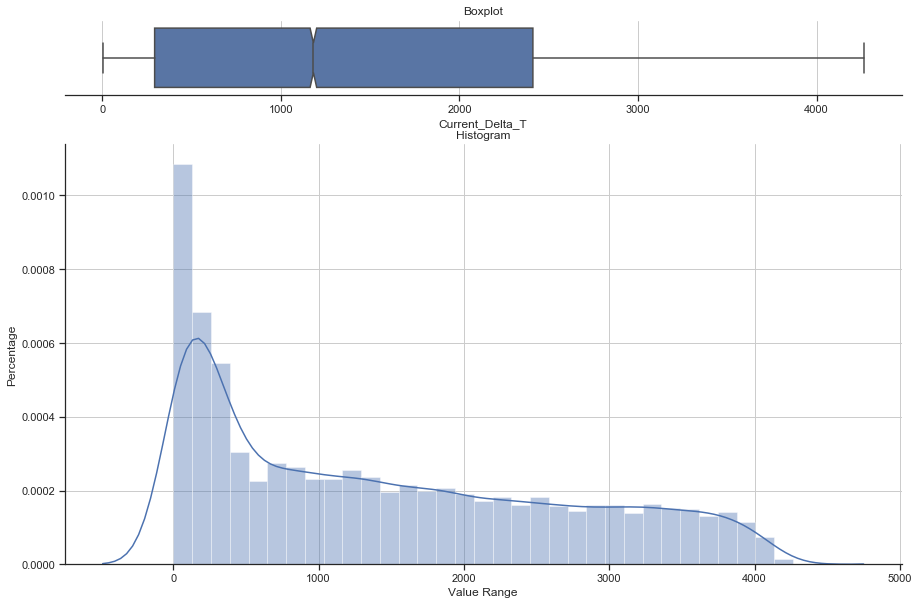

In [377]:
boxplot_histogram(scored_ek_df.Current_Delta_T)

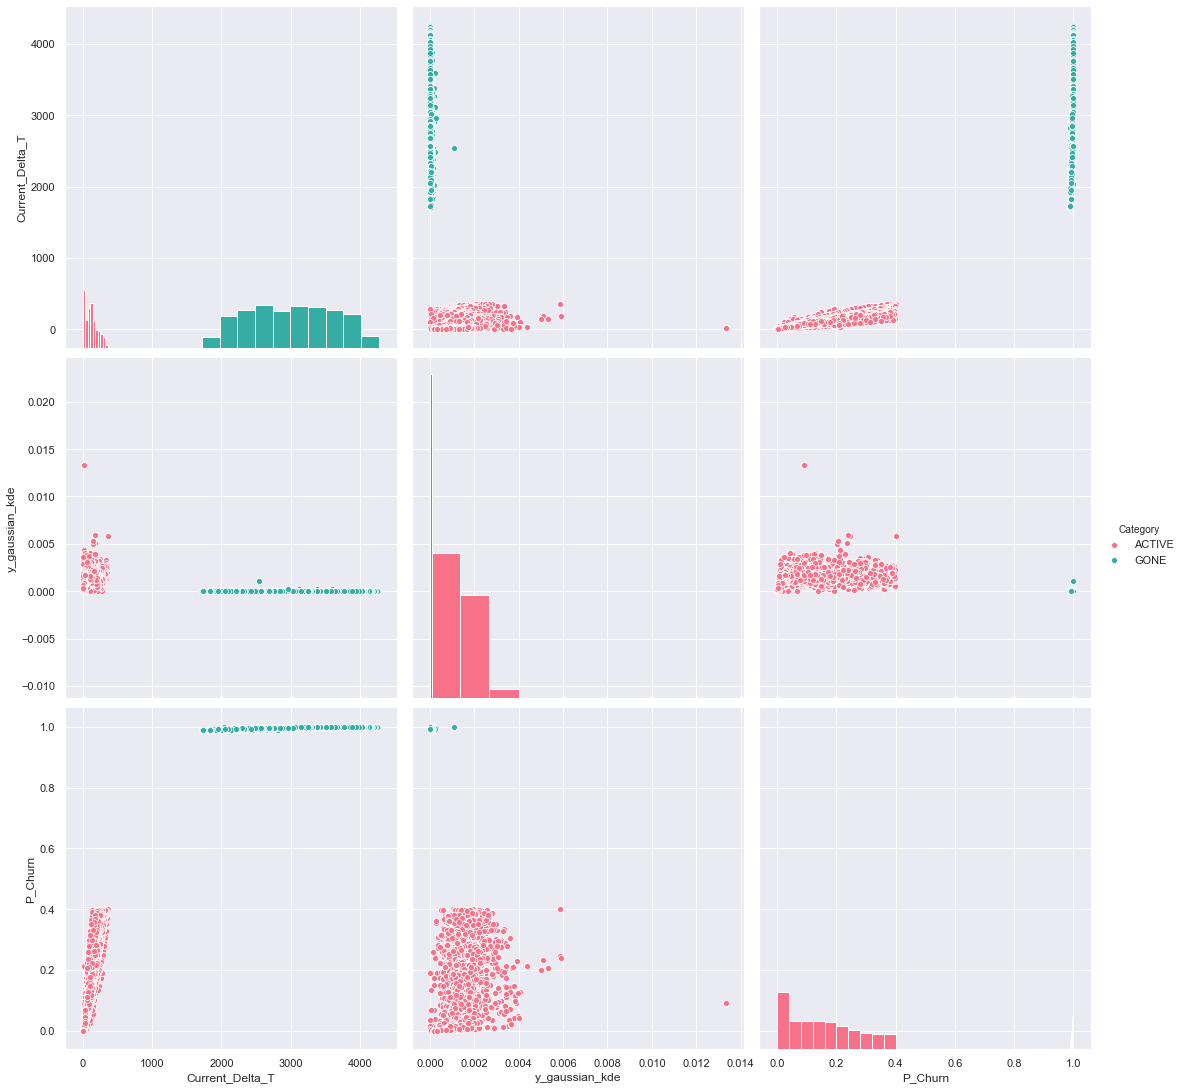

In [382]:
sns.set(style="darkgrid")
_interesting_columns_ = [
    "ENDKUNDE_BRANCHENKAT",
    "Current_Delta_T",
    "y_gaussian_kde",
    "P_Churn",
    "Category",
]
sns.pairplot(
    scored_ek_df.loc[scored_ek_df.Category != "MEH", _interesting_columns_],
    hue="Category",
    height=5,
    palette="husl",
    # corner=True,
    diag_kind="hist",
)

In [379]:
crm_df_raw.head(5)

,BETREFF,KANAL,DATUM,QUELLE,VERANTWORTLICH,KUERZEL,ENDKUNDE_NR,VB_FILTER_VON,VB_FILTER_BIS,VB_FILTER_GRUND,YEAR,KW,KW_2,KW_4
0,Ost - Aktionen - 2014 - ACO F200 Leuchtplakate...,E-Mail,2014-10-08,Marketing,Liliane Schüpbach (REGION OST ZÜRICH),LSC,100034,NaT,NaT,NaN,2014,41,41,41
1,City ePanel Winterthur,Besuch,2014-11-03,Verkauf,Alma Coralic (REGION OST ZÜRICH),ACO,100034,NaT,NaT,NaN,2014,45,45,45
2,KMU Forum,Besuch,2014-11-27,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,48,47,45
3,Ost - Aktionen - 2015 - ACO_KMU Aktion_KW5-7_2015,E-Mail,2014-12-11,Marketing,Larissa Zingre (KAM ZÜRICH),LKU,100034,NaT,NaT,NaN,2014,50,49,49
4,Cafe,Besuch,2014-12-23,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,52,51,49


In [380]:
set(crm_df_raw.QUELLE)

{'Contact Center', 'Marketing', 'Verkauf'}

In [381]:
bd_df_raw.head(5)

,ENDKUNDE_NR,ENDKUNDE,EK_ABC,EK_BONI,EK_PLZ,EK_ORT,EK_LAND,EK_HB_APG_KURZZ,EK_KAM_BETREUT,EK_AKTIV,AGENTUR,AG_HAUPTBETREUER,VERKAUFSBERATER,ENDKUNDE_BRANCHENGRUPPE_ID,ENDKUNDE_BRANCHENGRUPPE,ENDKUNDE_NBRANCHENGRUPPE_ID,ENDKUNDE_NBRANCHENGRUPPE,ENDKUNDE_BRANCHENKAT_ID,ENDKUNDE_BRANCHENKAT,ENDKUNDE_NBRANCHENKAT_ID,ENDKUNDE_NBRANCHENKAT,AUFTRAG_BRANCHENGRUPPE_ID,AUFTRAG_BRANCHENGRUPPE,AUFTRAG_NBRANCHENGRUPPE_ID,AUFTRAG_NBRANCHENGRUPPE,AUFTRAG_BRANCHENKAT_ID,AUFTRAG_BRANCHENKAT,AUFTRAG_NBRANCHENKAT_ID,AUFTRAG_NBRANCHENKAT,AGPS_NR,SEGMENT,KV_NR,KV_TYP,KAMPAGNEN_STATUS,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,AUFTRAGSART,RES_DAT,ANNULLATION_DATUM,AUSH_VON,DAUER,VERTRAG,BRUTTO,NETTO,AGGLO,PF,KAMP_BEGINN_JAHR,KAMP_BEGINN_KW,KAMP_BEGINN_KW_2,KAMP_BEGINN_KW_4,KAMP_ERFASS_JAHR,KAMP_ERFASS_KW,KAMP_ERFASS_KW_2,KAMP_ERFASS_KW_4
0,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040390,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-04,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
1,316770,JCDecaux Ltd.,NO,gut,W2 1YR,London,GREAT BRITAIN,DEA,1,1,JCDecaux,MAT,MAT,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,901,WG - Handel / Grossverteiler,NaN,NaN,14,WB - Handel,NaN,NaN,1040381,APG|SGA,542212,KPG,3,2008-10-13,NaT,Kommerziell,2008-10-13,2008-11-21,2009-05-11,7,Nein,0,0,"90306,90329,90404,91103,91301,91372,91407,9150...","Banner,City eBoard,City ePanel,Cube,Escalator ...",NaN,NaN,NaN,NaN,2008,42,41,41
2,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1041389,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-13,NaT,2009-04-27,7,Nein,3777,3210,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
3,119642,Hublot SA,A,gut,1260,Nyon 2,SCHWEIZ,BEG,1,1,NaN,NaN,CRO,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,555,WG - Persönlicher Bedarf,NaN,NaN,04,WB - Bekleidung / persönlicher Bedarf,NaN,NaN,1048493,APG|SGA,542499,KPG,4,2008-10-13,2009-04-27,Kommerziell,2008-10-24,2008-10-27,2009-04-27,14,Nein,0,0,"96300,A0230,A0261,A0351,A0371,A1061,A2701,A293...","BIG,Caisson lumineux,EntryPortal Poster,F12,F1...",2009,18,17,17,2008,42,41,41
4,136654,Vaterländische Union,E,gut,9490,Vaduz,LIECHTENSTEIN,REM,0,1,NaN,NaN,ERS,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,960,WG - Parteien,NaN,NaN,19,WB - Behörden / Politik,NaN,NaN,1041776,APG|SGA,542604,KPG,4,2008-10-13,2008-12-29,Politisch,2008-10-13,NaT,2008-12-29,14,Nein,4015,3011,NaN,F12,2009,1,1,1,2008,42,41,41


# Article

In [ ]:
# Calibration and Holdouts periods for data split
date_start = ["2013-04-01", "2014-04-01", "2015-04-01", "2016-04-01"]
calibration_period_end = ["2015-03-31", "2016-03-31", "2017-03-31", "2018-03-31"]
date_end = ["2016-03-31", "2017-03-31", "2018-03-31", "2019-03-31"]

# Arrays where to store the results of cross validation
accuracies_1y = []
holdouts_1y = []
predictions_1y = []

# Execute the cross validation
sample_size = ...  # sample size for each iteration
t_12 = 12  # units of time in holdout period

for i in range(0, len(date_start)):
    print("Loop n: ", i)

    # Select dataset and sample from a transaction dataframe (data) containing all transactions from 2013 onward.
    filtered_df = data[
        (pd.to_datetime(data["date"]) >= pd.to_datetime(date_start[i]))
        & (pd.to_datetime(data["date"]) <= pd.to_datetime(date_end[i]))
    ]
    sample = pd.DataFrame(filtered_df["customer_id"].unique()).sample(sample_size)
    sample.columns = ["customer_id"]
    cv_df = pd.merge(filtered_df, sample, on="customer_id", how="inner")

    # 12 months holdout - 2 years calibration
    cal_hold = calibration_and_holdout_data(
        cv_df,
        "customer_id",
        "date",
        calibration_period_end=calibration_period_end[i],
        observation_period_end=date_end[i],
        freq="M",
    )
    print("Cal_hol dataset n:", i)

    # BG/NBD model
    bgf_loop = BetaGeoFitter(
        penalizer_coef=0.001
    )  # ModifiedBetaGeoFitter assigns probability being alive <> 1 to customers who did 1 purchase: https://github.com/CamDavidsonPilon/lifetimes/issues/173
    bgf_loop.fit(cal_hold["frequency_cal"], cal_hold["recency_cal"], cal_hold["T_cal"])
    print(bgf_loop)
    print(bgf_loop.summary)

    # Results
    cal_hold[
        "predicted_purchases_12t"
    ] = bgf_loop.conditional_expected_number_of_purchases_up_to_time(
        t_12, cal_hold["frequency_cal"], cal_hold["recency_cal"], cal_hold["T_cal"]
    )
    holdout = cal_hold["frequency_holdout"].sum(axis=0)
    prediction = cal_hold["predicted_purchases_12t"].sum(axis=0)

    accuracies_1y.append((prediction - holdout) / holdout)
    holdouts_1y.append(holdout)
    predictions_1y.append(prediction)

    print(
        "Results: holdout: ",
        holdout,
        ", prediction: ",
        prediction,
        ", % Error: ",
        (holdout - prediction) / holdout,
    )

# Plot Cross Validation Results
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams.update({"font.size": 20})
N = len(holdouts_1y)
t = ["2015", "2016", "2017", "2018"]

ind = np.arange(N)
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, holdouts_1y, width, color="#4472C4")
rects2 = ax.bar(ind + width / 2, predictions_1y, width, color="#ED7C32")

ax.set_ylabel("Transactions")
ax.set_title("4 Periods Cross Validation - 2 years Calibration & 1 year Holdout")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((t))

ax.legend(("Holdout", "Prediction"), loc=3)
ax2 = ax.twinx()
ax2.plot(accuracies_1y, marker="d", color="#8FAADC")

ax2.set_ylabel("Prediction Error")
ax2.legend(["Prediction Error"], loc=4)

plt.show()